<a href="https://colab.research.google.com/github/cherest555/CLASS_AI4DL/blob/main/%EB%8F%84%EC%84%9C%EA%B4%80_%EC%95%84%EB%8F%99%2C%EB%AC%B8%ED%95%99%EC%82%AD%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분야별 대출비율 분석

## 데이터준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
####
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
###


plt.rc('font', family='NanumBarunGothic')

In [3]:
# 통합기간,연령별
total_10 = pd.read_csv('/content/drive/MyDrive/library/통합 데이터/total_10.csv',encoding="cp949",delimiter=',')
total_20 = pd.read_csv('/content/drive/MyDrive/library/통합 데이터/total_20.csv',encoding="cp949",delimiter=',')
total_30 = pd.read_csv('/content/drive/MyDrive/library/통합 데이터/total_30.csv',encoding="cp949",delimiter=',')

total_MZ = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/mz.csv',encoding="cp949",delimiter=',',header=12)
total_noMZ = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/비mz.csv',encoding="cp949",delimiter=',',header=12)

In [4]:
print(total_MZ)

       순위                                          서명                     저자  \
0       1                                  선량한 차별주의자                  김지혜 지음   
1       2     사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문   지은이: 유발 하라리 ;옮긴이: 조현욱   
2       3                어떻게 말해줘야 할까 :오은영의 현실밀착 육아회화         글: 오은영 ;그림: 차상미   
3       4            아주 작은 습관의 힘 :최고의 변화는 어떻게 만들어지는가      제임스 클리어 지음 ;이한이 옮김   
4       5        타이탄의 도구들 :1만 시간의 법칙을 깬 거인들의 61가지 전략        팀 페리스 지음 ;정지현 옮김   
..    ...                                         ...                    ...   
995   994           나는 농담으로 과학을 말한다 :지식을 향유하는 놀라운 방법                   오후 지음   
996   997                                거의 모든 것의 역사     저자: 빌 브라이슨 ;역자: 이덕환   
997   997           기획의 정석 :무에서 유를 만드는 10가지 빡신 기획 습관                  박신영 지음   
998   997                          (Do it!) 점프 투 파이썬                  박응용 지음   
999  1000  바이러스 쇼크 =인류 재앙의 실체 알아야 살아남는다 /Virus shock                  최강석 지음   

                  출판사  출판년도   권        

## 분야분석(mz,연령별)

In [5]:
# ISBN부가기호열에 결측치가 있는 행을 삭제
total_10.dropna(subset=['ISBN부가기호'], inplace=True)
total_20.dropna(subset=['ISBN부가기호'], inplace=True)
total_30.dropna(subset=['ISBN부가기호'], inplace=True)
total_MZ.dropna(subset=['ISBN부가기호'], inplace=True)
total_noMZ.dropna(subset=['ISBN부가기호'], inplace=True)

# 'ISBN부가기호' 열을 정수형으로 변환
total_10['ISBN부가기호'] = total_10['ISBN부가기호'].astype(int)
total_20['ISBN부가기호'] = total_20['ISBN부가기호'].astype(int)
total_30['ISBN부가기호'] = total_30['ISBN부가기호'].astype(int)
total_MZ['ISBN부가기호'] = total_MZ['ISBN부가기호'].astype(int)
total_noMZ['ISBN부가기호'] = total_noMZ['ISBN부가기호'].astype(int)

# 만화카테고리의 책 삭제
total_10 = total_10[total_10['ISBN부가기호'].astype(str).str[1] != '7']
total_20 = total_20[total_20['ISBN부가기호'].astype(str).str[1] != '7']
total_30 = total_30[total_30['ISBN부가기호'].astype(str).str[1] != '7']
total_MZ = total_MZ[total_MZ['ISBN부가기호'].astype(str).str[1] != '7']
total_noMZ = total_noMZ[total_noMZ['ISBN부가기호'].astype(str).str[1] != '7']




# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
total_10['부가기호추출'] = total_10['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
total_20['부가기호추출'] = total_20['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
total_30['부가기호추출'] = total_30['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
total_MZ['부가기호추출'] = total_MZ['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
total_noMZ['부가기호추출'] = total_noMZ['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)


# 문학 삭제
total_MZ = total_MZ[total_MZ['부가기호추출'].astype(str).str[0] != '8']
total_noMZ = total_noMZ[total_noMZ['부가기호추출'].astype(str).str[0] != '8']

<ipython-input-5-caad4fd36a63>:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_10['부가기호추출'] = total_10['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-5-caad4fd36a63>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_10['부가기호추출'] = total_10['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-5-caad4fd36a63>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t

In [6]:
total_10.head()

,순위,서명,저자,출판사,출판년도,ISBN,ISBN부가기호,KDC,대출건수,부가기호추출
0,1,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",이치조 미사키 지음 ;권영주 옮김,바이포엠,2021,9.790000e+12,3830,833.6,"1,736",83
1,2,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012,9.790000e+12,3830,833.6,"1,617",83
2,3,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9.790000e+12,3810,813.7,"1,544",81
3,4,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9.790000e+12,3810,813.7,"1,382",81
4,5,선량한 차별주의자,김지혜 지음,창비,2019,9.790000e+12,3300,334.0,"1,330",30


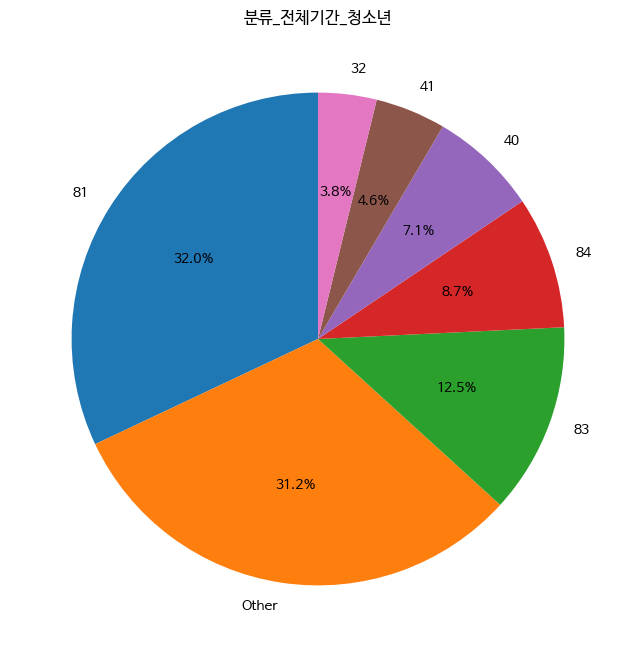

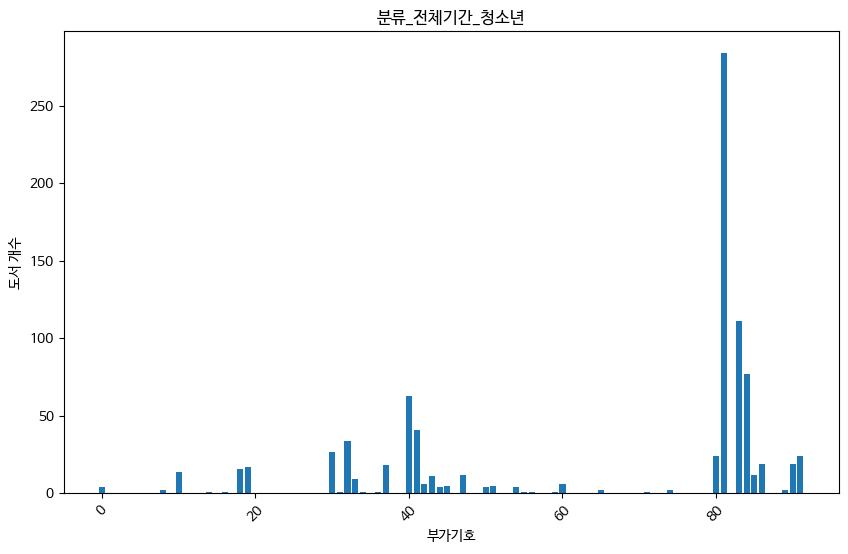

In [7]:
# 부가기호를 종류별로 세기
counts = total_10['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_6 = counts.nlargest(6).index.tolist()

# 기타로 묶일 부가기호 추출
other_categories = counts[~counts.index.isin(top_6)]

# 상위 6개 부가기호 외의 부가기호를 기타로 묶음
total_10.loc[total_10['부가기호추출'].isin(other_categories.index), '부가기호추출'] = 'Other'

# 각 부가기호의 도서 개수를 비율로 변환
ratios = total_10['부가기호추출'].value_counts(normalize=True) * 100

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(ratios, labels=ratios.index, autopct='%.1f%%', startangle=90)
plt.title('분류_전체기간_청소년')
plt.show()

# 바차트로 시각화
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts)
plt.xlabel('부가기호')
plt.ylabel('도서 개수')
plt.title('분류_전체기간_청소년')
plt.xticks(rotation=45)
plt.show()

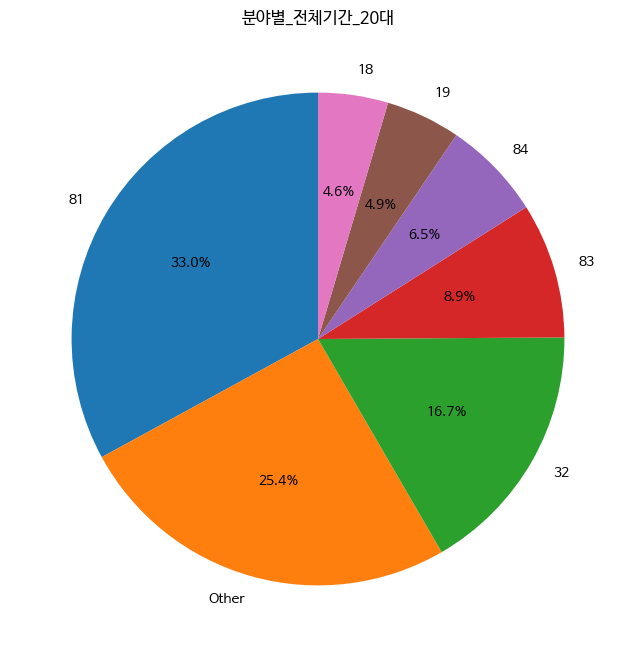

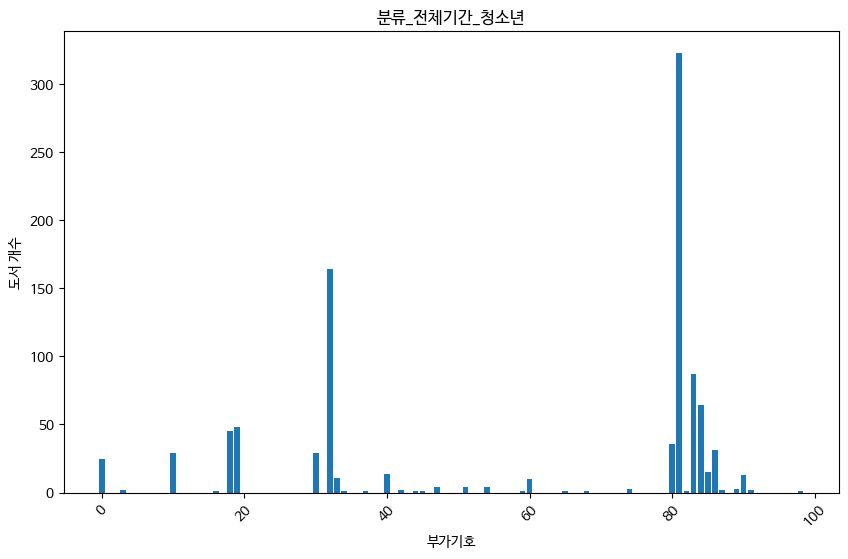

In [8]:
# 부가기호를 종류별로 세기
counts = total_20['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_6 = counts.nlargest(6).index.tolist()

# 기타로 묶일 부가기호 추출
other_categories = counts[~counts.index.isin(top_6)]

# 상위 6개 부가기호 외의 부가기호를 기타로 묶음
total_20.loc[total_20['부가기호추출'].isin(other_categories.index), '부가기호추출'] = 'Other'

# 각 부가기호의 도서 개수를 비율로 변환
ratios = total_20['부가기호추출'].value_counts(normalize=True) * 100

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(ratios, labels=ratios.index, autopct='%.1f%%', startangle=90)
plt.title('분야별_전체기간_20대')
plt.show()

# 바차트로 시각화
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts)
plt.xlabel('부가기호')
plt.ylabel('도서 개수')
plt.title('분류_전체기간_청소년')
plt.xticks(rotation=45)
plt.show()

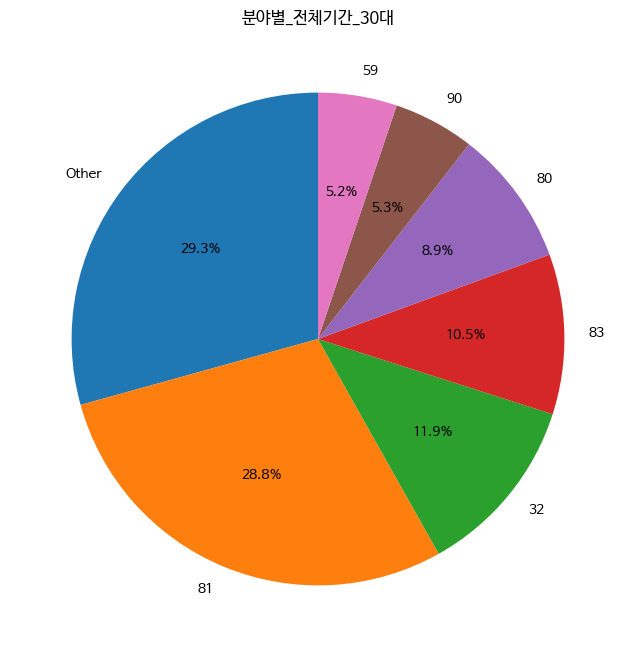

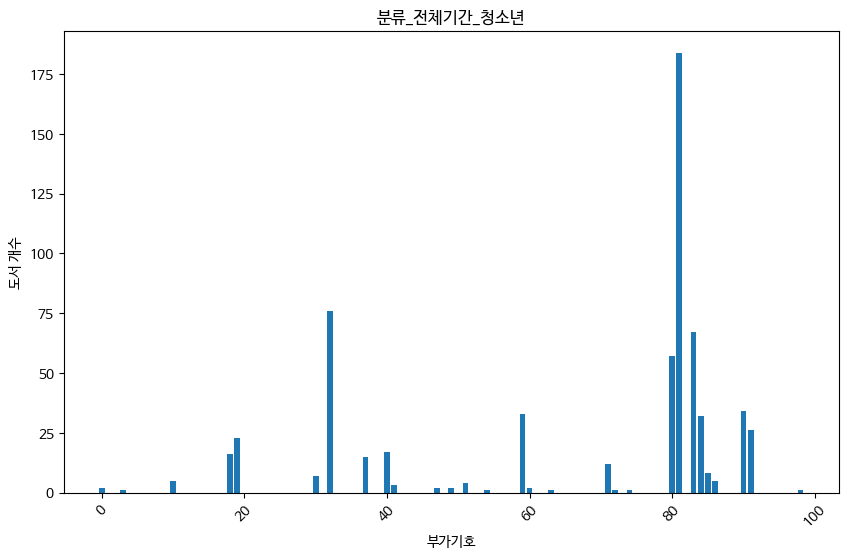

In [9]:
# 부가기호를 종류별로 세기
counts = total_30['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_6 = counts.nlargest(6).index.tolist()

# 기타로 묶일 부가기호 추출
other_categories = counts[~counts.index.isin(top_6)]

# 상위 6개 부가기호 외의 부가기호를 기타로 묶음
total_30.loc[total_30['부가기호추출'].isin(other_categories.index), '부가기호추출'] = 'Other'

# 각 부가기호의 도서 개수를 비율로 변환
ratios = total_30['부가기호추출'].value_counts(normalize=True) * 100

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(ratios, labels=ratios.index, autopct='%.1f%%', startangle=90)
plt.title('분야별_전체기간_30대')
plt.show()

# 바차트로 시각화
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts)
plt.xlabel('부가기호')
plt.ylabel('도서 개수')
plt.title('분류_전체기간_청소년')
plt.xticks(rotation=45)
plt.show()

In [10]:
# 부가기호를 종류별로 세기
counts = total_MZ['부가기호추출'].value_counts()
print(counts)

32    323
59     84
19     61
18     48
30     36
37     35
40     32
10     27
90     23
0      19
33     15
51     13
91     13
60     12
71      9
41      5
54      4
47      4
74      3
44      2
63      2
45      2
42      2
3       2
34      1
16      1
50      1
2       1
49      1
98      1
43      1
66      1
70      1
Name: 부가기호추출, dtype: int64


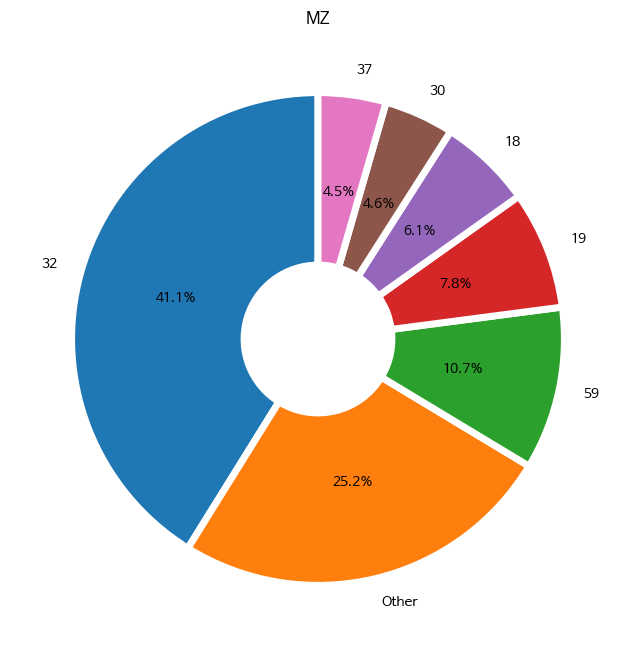

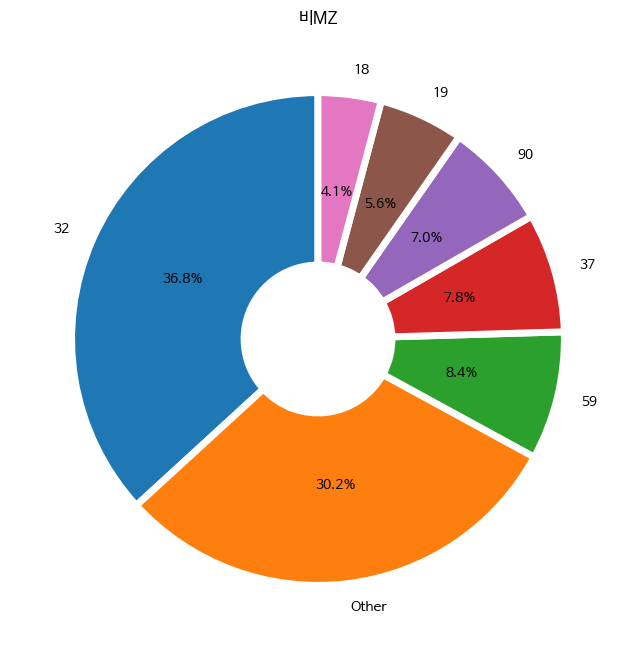

In [11]:
# MZ와 비MZ의 차이보여주기

## MZ
# 부가기호를 종류별로 세기
counts = total_MZ['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_10 = counts.nlargest(6).index.tolist()

# 기타로 묶일 부가기호 추출
other_categories = counts[~counts.index.isin(top_10)]

# 상위 6개 부가기호 외의 부가기호를 기타로 묶음
total_MZ.loc[total_MZ['부가기호추출'].isin(other_categories.index), '부가기호추출'] = 'Other'

# 각 부가기호의 도서 개수를 비율로 변환
ratios1 = total_MZ['부가기호추출'].value_counts(normalize=True) * 100

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0',]
plt.pie(ratios1, labels=ratios1.index, autopct='%.1f%%', startangle=90,wedgeprops=wedgeprops)
plt.title('MZ')
plt.show()


## 비MZ
# 부가기호를 종류별로 세기
counts = total_noMZ['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_6 = counts.nlargest(6).index.tolist()

# 기타로 묶일 부가기호 추출
other_categories = counts[~counts.index.isin(top_6)]

# 상위 6개 부가기호 외의 부가기호를 기타로 묶음
total_noMZ.loc[total_noMZ['부가기호추출'].isin(other_categories.index), '부가기호추출'] = 'Other'

# 각 부가기호의 도서 개수를 비율로 변환
ratios2 = total_noMZ['부가기호추출'].value_counts(normalize=True) * 100

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratios2, labels=ratios2.index, autopct='%.1f%%', startangle=90,wedgeprops=wedgeprops)
plt.title('비MZ')
plt.show()

In [12]:
print(ratios1)
print(ratios2)

32       41.146497
Other    25.222930
59       10.700637
19        7.770701
18        6.114650
30        4.585987
37        4.458599
Name: 부가기호추출, dtype: float64
32       36.804565
Other    30.242511
59        8.416548
37        7.845934
90        6.990014
19        5.563481
18        4.136947
Name: 부가기호추출, dtype: float64


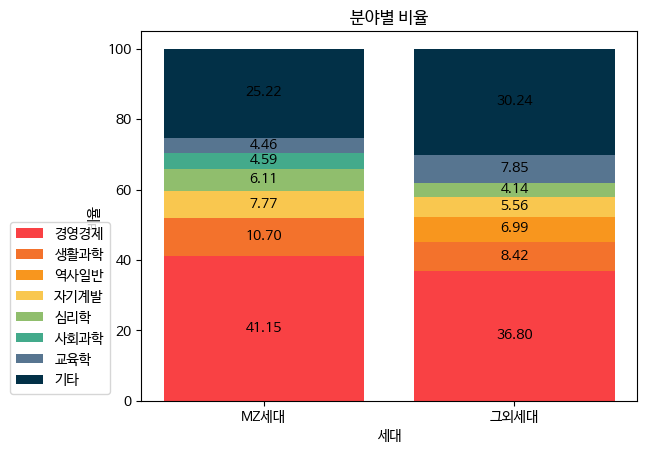

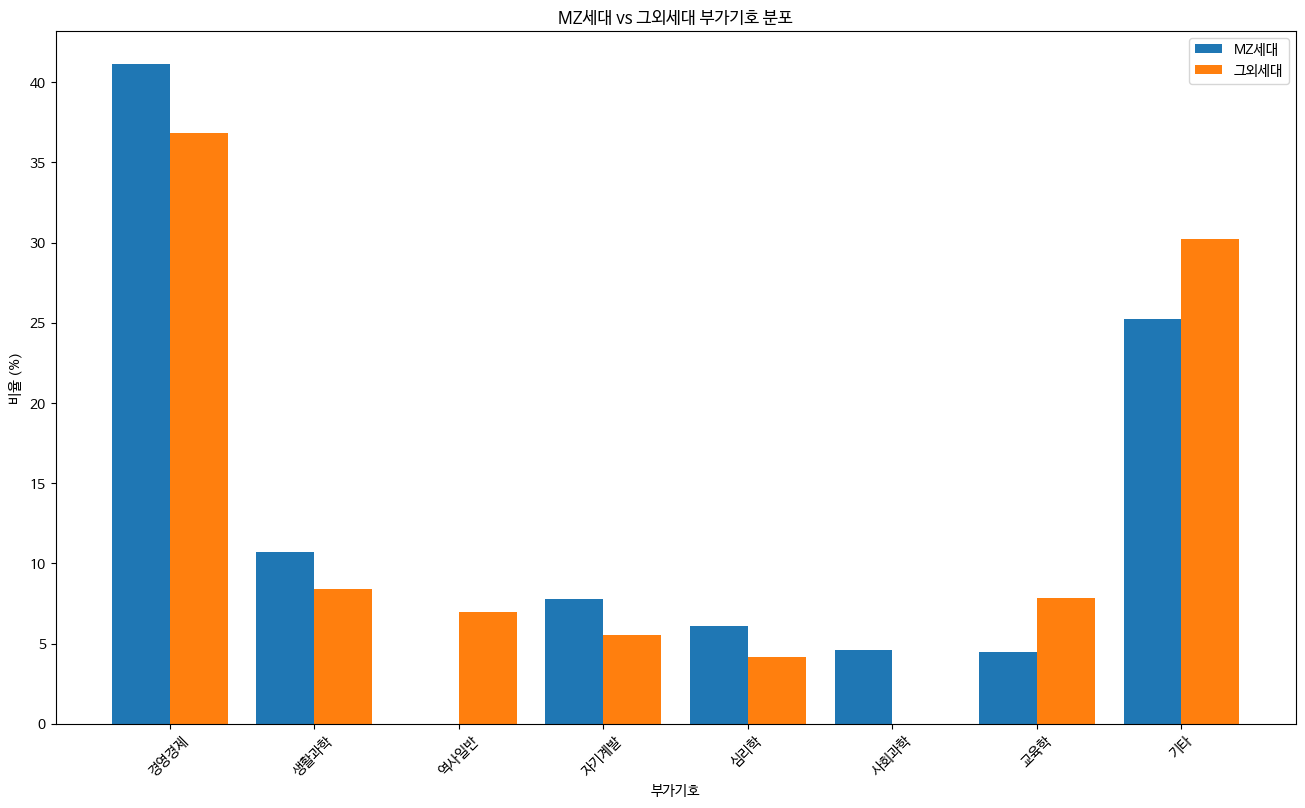

In [13]:
categories = ['경영경제', '생활과학','역사일반', '자기계발', '심리학', '사회과학','교육학','기타']

topics = ['MZ세대', '그외세대']

from matplotlib import pyplot as plt
import numpy as np
topics = ['MZ세대','그외세대']

ratios_mz = [41.146497,    10.700637,   0,         7.770701,   6.114650, 4.585987, 4.458599,25.222930]
ratios_other = [36.804565,   8.416548,     6.990014, 5.563481,  4.136947,    0,      7.845934,30.242511]


As = [41.146497, 36.804565]
Bs = [10.700637,8.416548]
Cs = [0,6.990014]
Ds = [7.770701,5.563481]
Es = [6.114650,4.136947]
Fs = [4.585987,0]
Gs = [4.458599,7.845934]
Hs = [25.222930,30.242511]


c_bottom = np.add(As, Bs)
d_bottom = np.add(c_bottom, Cs)
e_bottom = np.add(d_bottom, Ds)
f_bottom = np.add(e_bottom, Es)
g_bottom = np.add(f_bottom, Fs)
h_bottom = np.add(g_bottom, Gs)

x = range(len(topics))

# colors = ['#D1D6A0', '#B2C79C', '#62A7AE', '#5C5C82', '#735668', '#B794B4']
colors = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b','#577590', '#023047']

plt.bar(x, As, color=colors[0], label='경영경제')
plt.bar(x, Bs, bottom=As, color=colors[1], label='생활과학')
plt.bar(x, Cs, bottom=c_bottom, color=colors[2], label='역사일반')
plt.bar(x, Ds, bottom=d_bottom, color=colors[3], label='자기계발')
plt.bar(x, Es, bottom=e_bottom, color=colors[4], label='심리학')
plt.bar(x, Fs, bottom=f_bottom, color=colors[5], label='사회과학')
plt.bar(x, Gs, bottom=g_bottom, color=colors[6], label='교육학')
plt.bar(x, Hs, bottom=h_bottom, color=colors[7], label='기타')

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('분야별 비율')
plt.xlabel('세대')
plt.ylabel('비율')
plt.legend()

# 범례 아이템 생성
handles, labels = ax.get_legend_handles_labels()
reversed_handles = handles[::-1]
reversed_labels = labels[::-1]

# 범례를 왼쪽하단에 배치하도록 설정
plt.legend(loc='lower right', bbox_to_anchor=(-.05, 0))


x = np.arange(len(categories))  # x 좌표를 0부터 시작하는 배열로 변경

# 데이터 위에 숫자 표시
for i, (a, b, c, d, e, f, g, h) in enumerate(zip(As, Bs, Cs, Ds, Es, Fs, Gs, Hs)):
    plt.bar(i, a, color=colors[0])
    plt.bar(i, b, bottom=a, color=colors[1])
    plt.bar(i, c, bottom=c_bottom[i], color=colors[2])
    plt.bar(i, d, bottom=d_bottom[i], color=colors[3])
    plt.bar(i, e, bottom=e_bottom[i], color=colors[4])
    plt.bar(i, f, bottom=f_bottom[i], color=colors[5])
    plt.bar(i, g, bottom=g_bottom[i], color=colors[6])
    plt.bar(i, h, bottom=h_bottom[i], color=colors[7])

    if a >= 0.1:
        plt.text(i, a / 2, f'{a:.2f}', ha='center', va='center')
    if b >= 0.1:
        plt.text(i, a + b / 2, f'{b:.2f}', ha='center', va='center')
    if c >= 0.1:
        plt.text(i, a + b + c / 2, f'{c:.2f}', ha='center', va='center')
    if d >= 0.1:
        plt.text(i, a + b + c + d / 2, f'{d:.2f}', ha='center', va='center')
    if e >= 0.1:
        plt.text(i, a + b + c + d + e / 2, f'{e:.2f}', ha='center', va='center')
    if f >= 0.1:
        plt.text(i, a + b + c + d + e + f / 2, f'{f:.2f}', ha='center', va='center')
    if g >= 0.1:
        plt.text(i, a + b + c + d + e + f + g / 2, f'{g:.2f}', ha='center', va='center')
    if h >= 0.1:
        plt.text(i, a + b + c + d + e + f + g + h / 2, f'{h:.2f}', ha='center', va='center')


# 그래프 그리기
plt.figure(figsize=(16, 9))
plt.bar(x - 0.2, ratios_mz, width=0.4, label=topics[0])  # x 좌표를 조정하여 겹치지 않게 그림
plt.bar(x + 0.2, ratios_other, width=0.4, label=topics[1])  # x 좌표를 조정하여 겹치지 않게 그림

plt.xticks(x, categories, rotation=45)  # x축에 카테고리 이름을 추가하고 45도 회전
plt.xlabel('부가기호')
plt.ylabel('비율 (%)')
plt.title('MZ세대 vs 그외세대 부가기호 분포')
plt.legend()
  # 그래프 요소들이 잘 나타나도록 레이아웃 조정
plt.show()

## MZ세대의 경영경제분야 세부분석

1.   항목 추가
2.   항목 추가



In [14]:
# 분야별 세부 분석

# 경제경영( 타세대보다 압도적 독서율 )
total_MZ_2 = pd.read_csv('/content/drive/MyDrive/library/통합 데이터/total_MZ.csv',encoding="cp949",delimiter=',',header=11)

# ISBN부가기호열에 결측치가 있는 행을 삭제
total_MZ_2.dropna(subset=['ISBN부가기호'], inplace=True)


# 'ISBN부가기호' 열을 정수형으로 변환
total_MZ_2['ISBN부가기호'] = total_MZ_2['ISBN부가기호'].astype(int)

# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
total_MZ_2['부가기호추출'] =total_MZ_2['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)

data_32 = total_MZ_2[total_MZ_2['부가기호추출'] == 32]
data_32.sort_values(by='대출건수', ascending=False).head(10)

<ipython-input-14-e5ea87bd5133>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_MZ_2['부가기호추출'] =total_MZ_2['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)


,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,Unnamed: 10,부가기호추출
22,23,돈의 속성 :최상위 부자가 말하는 돈에 대한 모든 것,지은이: 김승호,Snowfox(스노우폭스북스),2020,NaN,9791188331796,3320,327.040,"5,741",NaN,32
40,41,(서울 자가에 대기업 다니는) 김 부장 이야기,송희구 지음,서삼독,2021,1.0,9791165343996,3320,325.040,"4,804",NaN,32
41,42,부자 아빠 가난한 아빠 :20주년 특별 기념판,지은이: 로버트 기요사키 ;옮긴이: 안진환,민음인,2018,NaN,9791158883591,3320,327.040,"4,743",NaN,32
46,47,(서울 자가에 대기업 다니는) 김 부장 이야기,송희구 지음,서삼독,2021,2.0,9791165344009,3320,325.040,"4,546",NaN,32
57,58,(서울 자가에 대기업 다니는) 김 부장 이야기,송희구 지음,서삼독,2021,3.0,9791165344221,3320,325.040,"4,080",NaN,32
58,59,부의 추월차선 :부자들이 말해 주지 않는 진정한 부를 얻는 방법,엠제이 드마코 지음 ;신소영 옮김,북새통,2013,NaN,9788994702346,13320,327.040,"3,999",NaN,32
59,60,돈의 심리학 :당신은 왜 부자가 되지 못했는가,모건 하우절 지음 ;이지연 옮김,인플루엔셜,2021,NaN,9791191056372,3320,327.040,"3,998",NaN,32
63,64,부의 인문학 :슈퍼리치의 서재에서 찾아낸 부자의 길,브라운스톤 지음,Openmind(오픈마인드),2019,NaN,9788995563502,3320,327.040,"3,886",NaN,32
64,65,월급쟁이 부자로 은퇴하라 :3년 만에 30년 치 연봉을 번 김 과장의 시스템 마련법,너나위 지음,RHK(알에이치코리아),2019,NaN,9788925566511,3320,327.870,"3,872",NaN,32
74,75,역행자 :돈·시간·운명으로부터 완전한 자유를 얻는 7단계 인생 공략집,자청 지음,웅진씽크빅,2022,NaN,9788901260716,3320,325.211,"3,700",NaN,32


##성별 분야분석

데이터준비

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mz_female = pd.read_csv('/content/drive/MyDrive/library/zm성별별/mz_female.csv',encoding="cp949",delimiter=',',header=11)
mz_male = pd.read_csv('/content/drive/MyDrive/library/zm성별별/mz_male.csv',encoding="cp949",delimiter=',',header=11)

부가기호추출

In [16]:
# ISBN부가기호열에 결측치가 있는 행을 삭제
mz_female.dropna(subset=['ISBN부가기호'], inplace=True)
mz_male.dropna(subset=['ISBN부가기호'], inplace=True)

# 'ISBN부가기호' 열을 정수형으로 변환
mz_female['ISBN부가기호'] = mz_female['ISBN부가기호'].astype(int)
mz_male['ISBN부가기호'] = mz_male['ISBN부가기호'].astype(int)

# 만화카테고리의 책 삭제
mz_female = mz_female[mz_female['ISBN부가기호'].astype(str).str[1] != '7']
mz_male = mz_male[mz_male['ISBN부가기호'].astype(str).str[1] != '7']

# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
mz_female['부가기호추출'] = mz_female['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
mz_male['부가기호추출'] = mz_male['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)

<ipython-input-16-00f461910183>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mz_female['부가기호추출'] = mz_female['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-16-00f461910183>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mz_female['부가기호추출'] = mz_female['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-16-00f461910183>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=Tr

In [17]:
## MZ남자
# 부가기호를 종류별로 세기
counts = mz_male['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_6 = counts.nlargest(6).index.tolist()

# 상위 6개 부가기호에 해당하는 데이터만 선택
top_6_data = mz_male[mz_male['부가기호추출'].isin(top_6)]

# 각 부가기호의 도서 개수를 비율로 변환
ratios1 = top_6_data['부가기호추출'].value_counts(normalize=True) * 100

## MZ여자
# 부가기호를 종류별로 세기
counts = mz_female['부가기호추출'].value_counts()

# 상위 6개 부가기호 추출
top_6 = counts.nlargest(6).index.tolist()

# 상위 6개 부가기호에 해당하는 데이터만 선택
top_6_data = mz_female[mz_female['부가기호추출'].isin(top_6)]

# 각 부가기호의 도서 개수를 비율로 변환
ratios2 = top_6_data['부가기호추출'].value_counts(normalize=True) * 100




In [18]:
print(ratios1)
print(ratios2)

32    42.439024
81    22.113821
83    16.585366
19     7.967480
90     5.853659
84     5.040650
Name: 부가기호추출, dtype: float64
81    46.725664
83    15.575221
32    13.097345
80     9.911504
84     9.203540
90     5.486726
Name: 부가기호추출, dtype: float64


In [19]:
print(ratios1[5:6])

84    5.04065
Name: 부가기호추출, dtype: float64


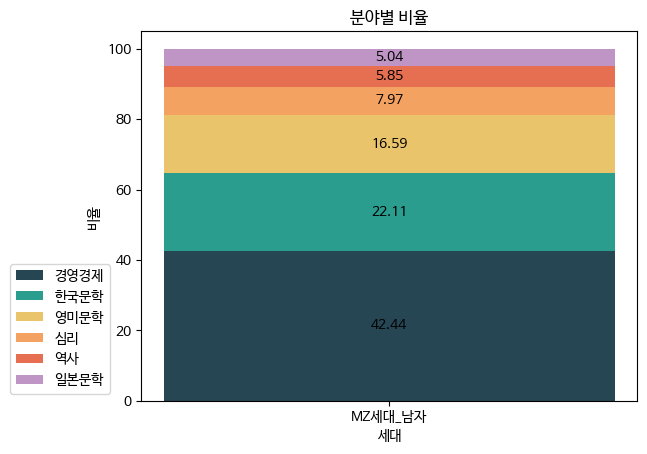

<Figure size 800x800 with 0 Axes>

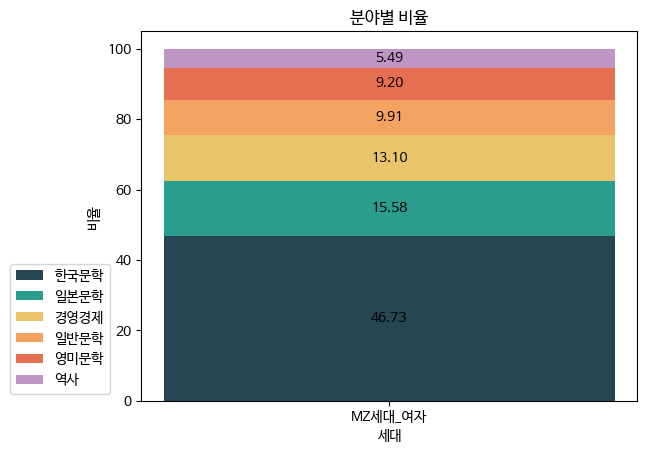

<Figure size 800x800 with 0 Axes>

In [20]:
from matplotlib import pyplot as plt
import numpy as np
topics = ['MZ세대_남자']
As = [42.439024]
Bs = [22.113821]
Cs = [16.585366]
Ds = [7.967480]
Es = [5.853659]
Fs = [5.040650]

c_bottom = np.add(As, Bs)
d_bottom = np.add(c_bottom, Cs)
e_bottom = np.add(d_bottom, Ds)
f_bottom = np.add(e_bottom, Es)
x = range(len(topics))

colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#be95c4']

plt.bar(x, As, color=colors[0], label='경영경제')
plt.bar(x, Bs, bottom=As, color=colors[1], label='한국문학')
plt.bar(x, Cs, bottom=c_bottom, color=colors[2], label='영미문학')
plt.bar(x, Ds, bottom=d_bottom, color=colors[3], label='심리')
plt.bar(x, Es, bottom=e_bottom, color=colors[4], label='역사')
plt.bar(x, Fs, bottom=f_bottom, color=colors[5], label='일본문학')
ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('분야별 비율')
plt.xlabel('세대')
plt.ylabel('비율')
plt.legend()

# 범례 아이템 생성
handles, labels = ax.get_legend_handles_labels()
reversed_handles = handles[::-1]
reversed_labels = labels[::-1]

# 범례를 왼쪽하단에 배치하도록 설정
plt.legend(loc='lower right', bbox_to_anchor=(-.05, 0))

# 데이터 위에 숫자 표시
for i, (a, b, c, d, e, f) in enumerate(zip(As, Bs, Cs, Ds, Es, Fs)):
    plt.text(i, a / 2, f'{a:.2f}', ha='center', va='center')
    plt.text(i, a + b / 2, f'{b:.2f}', ha='center', va='center')
    plt.text(i, a + b + c / 2, f'{c:.2f}', ha='center', va='center')
    plt.text(i, a + b + c + d / 2, f'{d:.2f}', ha='center', va='center')
    plt.text(i, a + b + c + d + e / 2, f'{e:.2f}', ha='center', va='center')
    plt.text(i, a + b + c + d + e + f / 2, f'{f:.2f}', ha='center', va='center')

plt.figure(figsize=(8,8))
plt.show()

##############################################################################

topics = ['MZ세대_여자']

mz_female = [42.451420, 17.638266, 16.292975, 11.360239, 7.174888, 5.082212]
mz_male = [44.321330,  22.576177, 11.911357, 8.587258, 6.509695, 6.094183]

As = [46.725664]
Bs = [15.575221]
Cs = [13.097345]
Ds = [9.911504]
Es = [9.203540]
Fs = [5.486726]



c_bottom = np.add(As, Bs)
d_bottom = np.add(c_bottom, Cs)
e_bottom = np.add(d_bottom, Ds)
f_bottom = np.add(e_bottom, Es)
x = range(len(topics))

# colors = ['#D1D6A0', '#B2C79C', '#62A7AE', '#5C5C82', '#735668', '#B794B4']
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#be95c4']

plt.bar(x, As, color=colors[0], label='한국문학')
plt.bar(x, Bs, bottom=As, color=colors[1], label='일본문학')
plt.bar(x, Cs, bottom=c_bottom, color=colors[2], label='경영경제')
plt.bar(x, Ds, bottom=d_bottom, color=colors[3], label='일반문학')
plt.bar(x, Es, bottom=e_bottom, color=colors[4], label='영미문학')
plt.bar(x, Fs, bottom=f_bottom, color=colors[5], label='역사')
ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('분야별 비율')
plt.xlabel('세대')
plt.ylabel('비율')
plt.legend()

# 범례 아이템 생성
handles, labels = ax.get_legend_handles_labels()
reversed_handles = handles[::-1]
reversed_labels = labels[::-1]

# 범례를 왼쪽하단에 배치하도록 설정
plt.legend(loc='lower right', bbox_to_anchor=(-.05, 0))

# 데이터 위에 숫자 표시
for i, (a, b, c, d, e, f) in enumerate(zip(As, Bs, Cs, Ds, Es, Fs)):
    plt.text(i, a / 2, f'{a:.2f}', ha='center', va='center')
    plt.text(i, a + b / 2, f'{b:.2f}', ha='center', va='center')
    plt.text(i, a + b + c / 2, f'{c:.2f}', ha='center', va='center')
    plt.text(i, a + b + c + d / 2, f'{d:.2f}', ha='center', va='center')
    plt.text(i, a + b + c + d + e / 2, f'{e:.2f}', ha='center', va='center')
    plt.text(i, a + b + c + d + e + f / 2, f'{f:.2f}', ha='center', va='center')

plt.figure(figsize=(8,8))
plt.show()



## 시기별 분석 (코로나위주)

In [21]:
# 데이터불러오기
y2018 = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/18년.csv',encoding="cp949",delimiter=',',header=12)
y2019 = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/19년.csv',encoding="cp949",delimiter=',',header=12)
y2020 = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/20년.csv',encoding="cp949",delimiter=',',header=12)
y2021 = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/21년.csv',encoding="cp949",delimiter=',',header=12)
y2022 = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/22년.csv',encoding="cp949",delimiter=',',header=12)
y2023 = pd.read_csv('/content/drive/MyDrive/library/만화문학삭제/23년.csv',encoding="cp949",delimiter=',',header=12)

In [22]:
# ISBN부가기호열에 결측치가 있는 행을 삭제
y2018.dropna(subset=['ISBN부가기호'], inplace=True)
y2019.dropna(subset=['ISBN부가기호'], inplace=True)
y2020.dropna(subset=['ISBN부가기호'], inplace=True)
y2021.dropna(subset=['ISBN부가기호'], inplace=True)
y2022.dropna(subset=['ISBN부가기호'], inplace=True)
y2023.dropna(subset=['ISBN부가기호'], inplace=True)

# 'ISBN부가기호' 열을 정수형으로 변환
y2018['ISBN부가기호'] = y2018['ISBN부가기호'].astype(int)
y2019['ISBN부가기호'] = y2019['ISBN부가기호'].astype(int)
y2020['ISBN부가기호'] = y2020['ISBN부가기호'].astype(int)
y2021['ISBN부가기호'] = y2021['ISBN부가기호'].astype(int)
y2022['ISBN부가기호'] = y2022['ISBN부가기호'].astype(int)
y2023['ISBN부가기호'] = y2023['ISBN부가기호'].astype(int)

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['ISBN부가기호'].astype(str).str[1] != '7']
y2019 = y2019[y2019['ISBN부가기호'].astype(str).str[1] != '7']
y2020 = y2020[y2020['ISBN부가기호'].astype(str).str[1] != '7']
y2021 = y2021[y2021['ISBN부가기호'].astype(str).str[1] != '7']
y2022 = y2022[y2022['ISBN부가기호'].astype(str).str[1] != '7']
y2023 = y2023[y2023['ISBN부가기호'].astype(str).str[1] != '7']



# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2019['부가기호추출'] = y2019['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2020['부가기호추출'] = y2020['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2021['부가기호추출'] = y2021['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2022['부가기호추출'] = y2022['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2023['부가기호추출'] = y2023['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)

# 문학 삭제
y2018 = y2018[y2018['부가기호추출'].astype(str).str[0] != '8']
y2019 = y2019[y2019['부가기호추출'].astype(str).str[0] != '8']
y2020 = y2020[y2020['부가기호추출'].astype(str).str[0] != '8']
y2021 = y2021[y2021['부가기호추출'].astype(str).str[0] != '8']
y2022 = y2022[y2022['부가기호추출'].astype(str).str[0] != '8']
y2023 = y2023[y2023['부가기호추출'].astype(str).str[0] != '8']

<ipython-input-22-ca292558cc28>:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-22-ca292558cc28>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-22-ca292558cc28>:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2019['부가기

In [23]:
# 부가기호를 종류별로 세기
count2018 = y2018['부가기호추출'].value_counts()
count2019 = y2019['부가기호추출'].value_counts()
count2020 = y2020['부가기호추출'].value_counts()
count2021 = y2021['부가기호추출'].value_counts()
count2022 = y2022['부가기호추출'].value_counts()
count2023 = y2023['부가기호추출'].value_counts()

In [24]:
print(count2023)

32    324
19     85
59     72
18     68
30     40
10     34
37     30
40     29
0      26
90     23
51     17
91     13
33     13
60     11
74      5
47      5
54      4
41      3
2       3
16      2
3       2
92      2
42      2
38      1
65      1
69      1
50      1
63      1
34      1
44      1
14      1
98      1
45      1
49      1
Name: 부가기호추출, dtype: int64


In [25]:
# 상위 6개 부가기호 추출
top_6_2018 = count2018[:6]
top_6_2019 = count2019[:6]
top_6_2020 = count2020[:6]
top_6_2021 = count2021[:6]
top_6_2022 = count2022[:6]
top_6_2023 = count2023[:6]

In [26]:
print([top_6_2018,top_6_2019,top_6_2020,top_6_2021,top_6_2022,top_6_2023])

[32    244
59    125
30     49
18     44
19     43
10     30
Name: 부가기호추출, dtype: int64, 32    267
59    135
19     54
18     51
30     37
10     30
Name: 부가기호추출, dtype: int64, 32    315
59     99
18     51
19     47
30     45
37     42
Name: 부가기호추출, dtype: int64, 32    326
59     83
19     55
18     46
37     38
30     34
Name: 부가기호추출, dtype: int64, 32    318
59     78
19     69
18     57
37     42
30     40
Name: 부가기호추출, dtype: int64, 32    324
19     85
59     72
18     68
30     40
10     34
Name: 부가기호추출, dtype: int64]


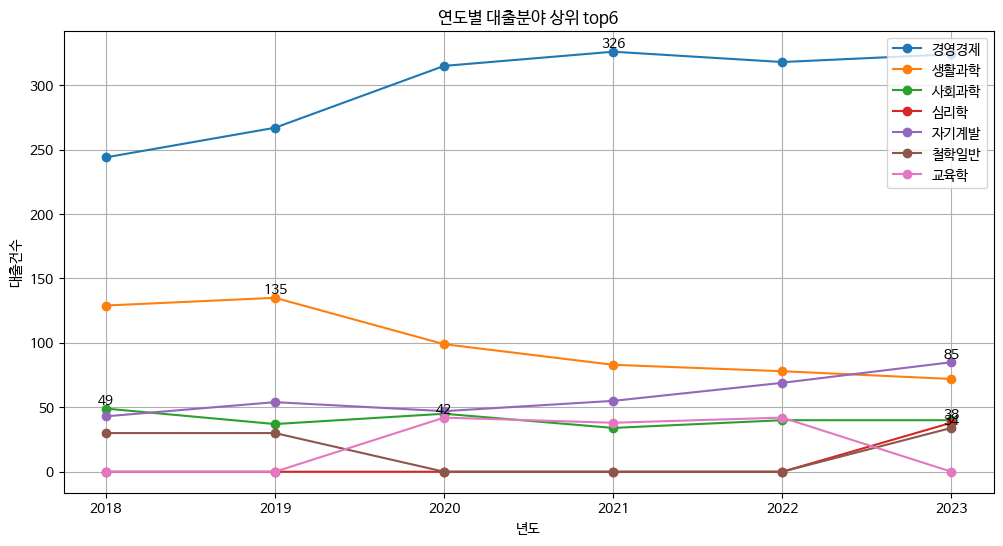

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    '경영경제': [244,267,315,326,318,324],
    '생활과학': [129, 135,99,83,78,72],
    '사회과학': [49,37,45,34,40,40],
    '심리학': [44,51,51,46,57,68],
    '자기계발': [43,54,47,55,69,85],
    '철학일반': [30,30,0,0,0,34],
    '교육학': [0, 0, 42, 38,42,0],
    '심리학': [0, 0, 0, 0, 0, 38]
}

years = ['2018', '2019', '2020', '2021', '2022', '2023']

df = pd.DataFrame(data, index=years)

plt.figure(figsize=(12, 6))

for category in df.columns:
    plt.plot(df.index, df[category], marker='o', label=category)

    # 가장 큰 값의 위치와 값 표시
    max_index = df[category].idxmax()
    max_value = df.at[max_index, category]
    plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')

plt.title('연도별 대출분야 상위 top6')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.legend(loc='upper right')  # 범례 위치 지정
plt.grid(True)
plt.show()

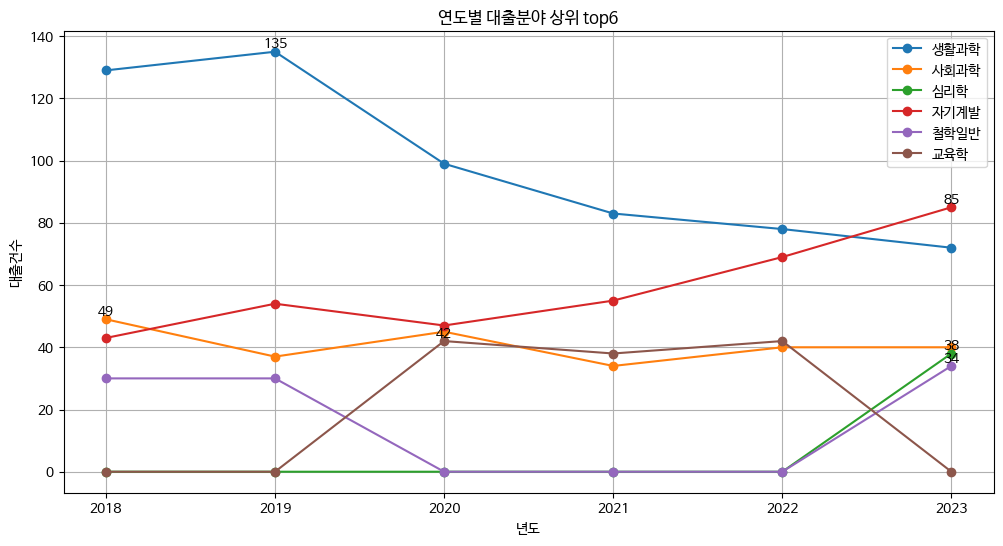

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    '생활과학': [129, 135,99,83,78,72],
    '사회과학': [49,37,45,34,40,40],
    '심리학': [44,51,51,46,57,68],
    '자기계발': [43,54,47,55,69,85],
    '철학일반': [30,30,0,0,0,34],
    '교육학': [0, 0, 42, 38,42,0],
    '심리학': [0, 0, 0, 0, 0, 38]
}

years = ['2018', '2019', '2020', '2021', '2022', '2023']

df = pd.DataFrame(data, index=years)

plt.figure(figsize=(12, 6))

for category in df.columns:
    plt.plot(df.index, df[category], marker='o', label=category)

    # 가장 큰 값의 위치와 값 표시
    max_index = df[category].idxmax()
    max_value = df.at[max_index, category]
    plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')

plt.title('연도별 대출분야 상위 top6')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.legend(loc='upper right')  # 범례 위치 지정
plt.grid(True)
plt.show()

특이점 확인해보기


In [29]:
# 2020~22년의 사회과학분야 도서
y2020_사회과학 = y2020[y2020['부가기호추출'] == 59]
y2021_사회과학 = y2021[y2021['부가기호추출'] == 59]
y2022_사회과학 = y2022[y2022['부가기호추출'] == 59]

# 필요한 열만 선택하여 출력
print(y2020_사회과학[['순위', '서명', '저자', '대출건수']][:5])
print(y2021_사회과학[['순위', '서명', '저자', '대출건수']][:5])
print(y2022_사회과학[['순위', '서명', '저자', '대출건수']][:5])
y2020_사회과학.head(10)

    순위                                                 서명      저자   대출건수
18  19  못 참는 아이 욱하는 부모 :분노조절장애의 시대를 사는 대한민국 부모에게 주는 육아...  오은영 지음  1,947
36  37               엄마의 말하기 연습 :화내지 않고 상처 주지 않고 진심을 전하는   박재연 지음  1,577
62  63   아이를 위한 하루 한 줄 인문학 :내면의 힘이 탄탄한 아이를 만드는 인생 문장 100   김종원 지음  1,234
71  72           아이 마음에 상처 주지 않는 습관 :내 아이를 위한 따뜻한 심리학 공부   이다랑 지음  1,160
74  75          (영어 앞에서 당당한 아이를 만드는 새벽달의) 엄마표 영어 17년 보고서   새벽달 지음  1,119
      순위                                                 서명               저자  \
0      1                       어떻게 말해줘야 할까 :오은영의 현실밀착 육아회화   글: 오은영 ;그림: 차상미   
18    19  못 참는 아이 욱하는 부모 :분노조절장애의 시대를 사는 대한민국 부모에게 주는 육아...           오은영 지음   
95    96     (36개월부터 영어를 모국어처럼 습득하는) 하루 1시간 현서네 유튜브 영어 학습법            배성기 지음   
99    99               엄마의 말하기 연습 :화내지 않고 상처 주지 않고 진심을 전하는            박재연 지음   
114  115          (영어 앞에서 당당한 아이를 만드는 새벽달의) 엄마표 영어 17년 보고서            새벽달 지음   

      대출건수  
0    4,732  
18   2,613  
95   1,372  
99   1,365  
114  1,294  
   

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,Unnamed: 10,부가기호추출
18,19,못 참는 아이 욱하는 부모 :분노조절장애의 시대를 사는 대한민국 부모에게 주는 육아...,오은영 지음,대성 Korea.com,2016,NaN,9788997396658,13590,598.100,"1,947",NaN,59
36,37,엄마의 말하기 연습 :화내지 않고 상처 주지 않고 진심을 전하는,박재연 지음,한빛라이프,2018,NaN,9791188007134,13590,598.100,"1,577",NaN,59
62,63,아이를 위한 하루 한 줄 인문학 :내면의 힘이 탄탄한 아이를 만드는 인생 문장 100,김종원 지음,청림출판,2018,NaN,9791188700288,13590,598.100,"1,234",NaN,59
71,72,아이 마음에 상처 주지 않는 습관 :내 아이를 위한 따뜻한 심리학 공부,이다랑 지음,길벗,2019,NaN,9791160507973,3590,598.100,"1,160",NaN,59
74,75,(영어 앞에서 당당한 아이를 만드는 새벽달의) 엄마표 영어 17년 보고서,새벽달 지음,청림출판,2016,NaN,9788997195916,13590,740.700,"1,119",NaN,59
87,86,초등 자존감 수업 :불안을 이기는 엄마가 아이의 자존감을 키운다,윤지영 지음,카시오페아,2019,NaN,9791188674855,3590,598.124,"1,048",NaN,59
109,109,아이의 떼 거부 고집을 다루다,정유진 글·그림,엔세임,2019,NaN,9791196630706,3590,598.100,947,NaN,59
129,130,초등 매일 공부의 힘 :학년이 올라갈수록 성적이 오르는 아이들의 비밀,이은경 지음,가나문화콘텐츠,2019,NaN,9788957360293,3590,375.340,857,NaN,59
133,134,똑게육아 =내 아이에게 '꿀잠' 선물하기 프로젝트 /Smart & lazy moth...,로리 지음,문학동네,2015,NaN,9788954639002,13590,598.100,845,NaN,59
139,140,(혼자서 원서 읽기가 되는) 영어 그림책 공부법,정정혜 지음,북하우스,2019,NaN,9791164050178,13590,740.700,820,NaN,59


In [30]:
# 2020~22년의 사회과학분야 도서
y2020_사회과학 = y2020[y2020['부가기호추출'] == 30]
y2021_사회과학 = y2021[y2021['부가기호추출'] == 30]
y2022_사회과학 = y2022[y2022['부가기호추출'] == 30]

# 필요한 열만 선택하여 출력
print(y2020_사회과학[['순위', '서명', '저자', '대출건수']][:5])
print(y2021_사회과학[['순위', '서명', '저자', '대출건수']][:5])
print(y2022_사회과학[['순위', '서명', '저자', '대출건수']][:5])

    순위                                             서명                    저자  \
0    1                                     선량한 차별주의자                 김지혜 지음   
3    4  팩트풀니스 :우리가 세상을 오해하는 10가지 이유와 세상이 생각보다 괜찮은 이유   지은이: 한스 로슬링,옮긴이: 이창신   
12  13                        개인주의자 선언 :판사 문유석의 일상유감               지은이: 문유석   
32  33             나는 매주 시체를 보러 간다 :서울대학교 최고의 '죽음'강의                 유성호 지음   
55  56    지리의 힘 :지리는 어떻게 개인의 운명을, 세계사를, 세계 경제를 좌우하는가    지은이: 팀 마샬 ;옮긴이: 김미선   

     대출건수  
0   3,663  
3   2,777  
12  2,077  
32  1,613  
55  1,267  
    순위                                             서명                     저자  \
1    2                                     선량한 차별주의자                  김지혜 지음   
4    5             공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가       마이클 샌델 지음 ;함규진 옮김   
7    8  팩트풀니스 :우리가 세상을 오해하는 10가지 이유와 세상이 생각보다 괜찮은 이유    지은이: 한스 로슬링,옮긴이: 이창신   
47  48                                      정의란 무엇인가   지은이: 마이클 샌델 ;옮긴이: 김명철   
52  53    지리의 힘 :지리는 어떻게 개인의 운명을, 세계사를, 세계 경제를 좌우하는가 

In [31]:
# 2019년의 철학일반분야 도서
y2023_철학일반 = y2023[y2023['부가기호추출'] == 10]

# 필요한 열만 선택하여 출력
print(y2023_철학일반[['순위', '서명', '저자', '대출건수']][:5])

    순위                                                 서명  \
10  11                   소크라테스 익스프레스 :철학이 우리 인생에 스며드는 순간    
20  21                                       이어령의 마지막 수업    
30  31  내가 틀릴 수도 있습니다 =숲속의 현자가 전하는 마지막 인생수업 /I may be ...   
40  41       철학은 어떻게 삶의 무기가 되는가 :불확실한 삶을 돌파하는 50가지 생각 도구    
50  51                            최재천의 공부 :어떻게 배우며 살 것인가    

                         저자   대출건수  
10        에릭 와이너 지음 ;김하현 옮김  1,473  
20                   김지수 지음  1,243  
30  비욘 나티코 린데블라드 지음 ;박미경 옮김  1,108  
40        야마구치 슈 지음 ;김윤경 옮김  1,010  
50             지은이: 최재천,안희경    901  


In [32]:
# 2018,2020년의 심리학분야 도서
y2023_심리학 = y2023[y2023['부가기호추출'] == 18]

# 필요한 열만 선택하여 출력
print(y2023_심리학[['순위', '서명', '저자', '대출건수']][:5])

    순위                                             서명                  저자  \
15  16  기분이 태도가 되지 않게 :기분 따라 행동하다 손해 보는 당신을 위한 심리 수업      레몬심리 지음 ;박영란 옮김   
16  17                      도파민네이션 :쾌락 과잉 시대에서 균형 찾기     애나 렘키 지음 ;김두완 옮김   
24  25              미움받을 용기 :자유롭고 행복한 삶을 위한 아들러의 가르침       기시미 이치로,전경아 옮김   
34  35   인스타 브레인 =몰입을 빼앗긴 시대, 똑똑한 뇌 사용법 /Insta brain   안데르스 한센 지음 ;김아영 옮김   
35  36                                     우울할 땐 뇌과학    앨릭스 코브 지음 ;정지인 옮김   

     대출건수  
15  1,293  
16  1,274  
24  1,216  
34  1,050  
35  1,042  


In [33]:
# 2021년의 자연문학분야 도서
y2021_자연과학 = y2021[y2021['부가기호추출'] == 40]

# 필요한 열만 선택하여 출력
print(y2021_자연과학[['순위', '서명', '저자', '대출건수']][:5])

      순위                                         서명                  저자   대출건수
36    37                                 코스모스 :특별판     칼 세이건 지음 ;홍승수 옮김  2,086
45    45                                    열두 발자국             지은이: 정재승  1,862
76    77       떨림과 울림 :물리학자 김상욱이 바라본 우주와 세계 그리고 우리               김상욱 지음  1,524
94    95                            아내를 모자로 착각한 남자    올리버 색스 지음 ;이정호 그림  1,373
157  158  시간은 흐르지 않는다 :우리의 직관 너머 물리학의 눈으로 본 우주의 시간   카를로 로벨리 지음 ;이중원 옮김  1,089


대출건수 트렌드 확인

In [34]:
# 데이터프레임 생성
df2018 = pd.DataFrame(y2018['대출건수'])
df2019 = pd.DataFrame(y2019['대출건수'])
df2020 = pd.DataFrame(y2020['대출건수'])
df2021 = pd.DataFrame(y2021['대출건수'])
df2022 = pd.DataFrame(y2022['대출건수'])
df2023 = pd.DataFrame(y2023['대출건수'])

# '대출건수' 열의 값을 숫자로 변환하여 더하기
total_sum1 = df2018['대출건수'].str.replace(',', '').astype(int).sum()
total_sum2 = df2019['대출건수'].str.replace(',', '').astype(int).sum()
total_sum3 = df2020['대출건수'].str.replace(',', '').astype(int).sum()
total_sum4 = df2021['대출건수'].str.replace(',', '').astype(int).sum()
total_sum5 = df2022['대출건수'].str.replace(',', '').astype(int).sum()
total_sum6 = df2023['대출건수'].str.replace(',', '').astype(int).sum()

print("총 대출건수:", total_sum1)
print("총 대출건수:", total_sum2)
print("총 대출건수:", total_sum3)
print("총 대출건수:", total_sum4)
print("총 대출건수:", total_sum5)
print("총 대출건수:", total_sum6)

총 대출건수: 859314
총 대출건수: 813497
총 대출건수: 481137
총 대출건수: 663620
총 대출건수: 692501
총 대출건수: 347513


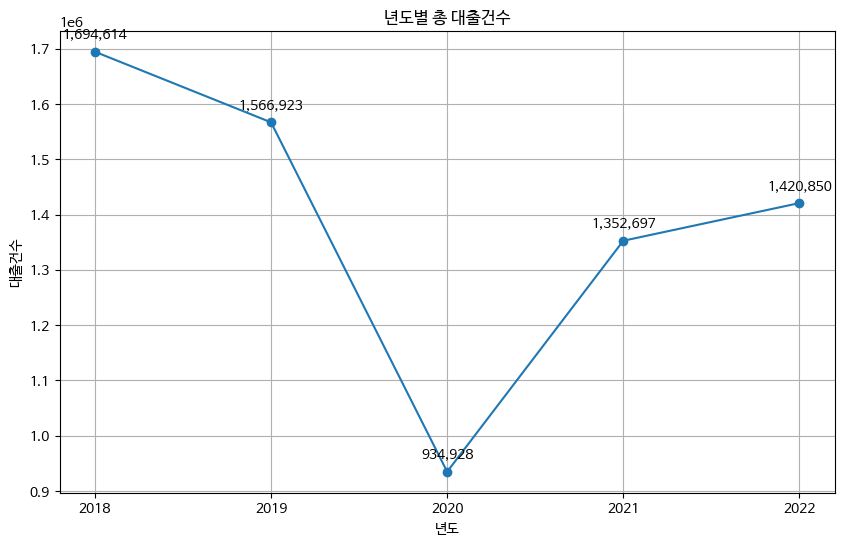

In [35]:
import matplotlib.pyplot as plt

# 년도와 대출건수 데이터
years = ['2018', '2019', '2020', '2021', '2022']
total_loan_counts = [1694614, 1566923, 934928, 1352697, 1420850]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, total_loan_counts, marker='o')

# 그래프에 값 표시
for i, txt in enumerate(total_loan_counts):
    plt.annotate(f'{txt:,}', (years[i], total_loan_counts[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('년도별 총 대출건수')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.grid(True)
plt.show()

## 경영경제분야 워드클라우드

데이터준비

In [36]:
total_MZ = pd.read_csv('/content/drive/MyDrive/library/통합 데이터/total_MZ.csv',encoding="cp949",delimiter=',',header=11)

# ISBN부가기호열에 결측치가 있는 행을 삭제
total_MZ.dropna(subset=['ISBN부가기호'], inplace=True)

# 'ISBN부가기호' 열을 정수형으로 변환
total_MZ['ISBN부가기호'] = total_MZ['ISBN부가기호'].astype(int)

# 만화카테고리의 책 삭제
total_MZ = total_MZ[total_MZ['ISBN부가기호'].astype(str).str[1] != '7']

# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
total_MZ['부가기호추출'] = total_MZ['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)

# 경영경제데이터만 남기기
df_filtered = total_MZ[total_MZ['부가기호추출'] == 32]

<ipython-input-36-7405aed6a3b6>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_MZ['부가기호추출'] = total_MZ['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)


In [37]:
print(df_filtered)

       순위                                    서명                        저자  \
22     23        돈의 속성 :최상위 부자가 말하는 돈에 대한 모든 것                   지은이: 김승호   
40     41            (서울 자가에 대기업 다니는) 김 부장 이야기                     송희구 지음   
41     42            부자 아빠 가난한 아빠 :20주년 특별 기념판    지은이: 로버트 기요사키 ;옮긴이: 안진환   
46     47            (서울 자가에 대기업 다니는) 김 부장 이야기                     송희구 지음   
57     58            (서울 자가에 대기업 다니는) 김 부장 이야기                     송희구 지음   
..    ...                                   ...                       ...   
932   932                 돈, 뜨겁게 사랑하고 차갑게 다루어라   지은이: 앙드레 코스톨라니 ;옮긴이: 김재경   
949   949  아기곰의 재테크 불변의 법칙 :전면 개정 리프레시 refresh                     아기곰 지음   
956   957             부자의 그릇 :돈을 다루는 능력을 키우는 법         이즈미 마사토 지음 ;김윤수 옮김   
984   985                       (댄 애리얼리) 부의 감각              댄 애리얼리,이경식 옮김   
999  1000                                   원칙          레이 달리오 지음 ;고영태 옮김   

                  출판사  출판년도    권           ISBN  ISBN부가기호      KDC   대출건수  

In [38]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 48.7 MB/s eta 0:00:00


In [39]:
from konlpy.tag import Okt
from collections import Counter

# 형태소 분석기 초기화
okt = Okt()

# 제목에서 가장 많이 쓰인 단어 추출
titles = df_filtered['서명']
word_counts = Counter()

for title in titles:
    words = okt.nouns(title)  # 제목에서 명사 추출
    words = [word for word in words if len(word) > 1]  # 길이가 1인 단어 제외
    word_counts.update(words)

# 불필요한 단어 제거
unwanted_words = ['장편소설', '소설집', '소설','남매','카카오','프렌즈','설민석']
for word in unwanted_words:
    if word in word_counts:
        del word_counts[word]

In [40]:
print(word_counts)

Counter({'투자': 19, '부자': 17, '부동산': 16, '부의': 13, '가지': 12, '주식': 8, '아빠': 7, '당신': 7, '경제': 7, '수업': 7, '슈퍼': 5, '트렌드': 5, '기술': 5, '자가': 4, '이야기': 4, '방법': 4, '자유': 4, '비밀': 4, '부와': 4, '시작': 4, '법칙': 4, '대한민국': 4, '경매': 4, '프로젝트': 4, '생각': 4, '원칙': 4, '모든': 3, '서울': 3, '대기업': 3, '부장': 3, '추월': 3, '차선': 3, '심리학': 3, '시스템': 3, '운명': 3, '전략': 3, '공부': 3, '월급': 3, '마음': 3, '사람': 3, '흐름': 3, '질문': 3, '존리': 3, '독립': 3, '관리': 3, '선택': 3, '개미': 3, '성공': 3, '속성': 2, '리치': 2, '연봉': 2, '과장': 2, '인생': 2, '기회': 2, '자본주의': 2, '기적': 2, '디지털': 2, '방식': 2, '코리아': 2, '소비': 2, '자산': 2, '아들': 2, '현실': 2, '대신': 2, '무기': 2, '데일': 2, '카네기': 2, '역사': 2, '명의': 2, '멘토': 2, '남자': 2, '정태익': 2, '반드시': 2, '달러': 2, '미래': 2, '지배': 2, '가장': 2, '산다': 2, '그릇': 2, '능력': 2, '메타': 2, '버스': 2, '아파트': 2, '청약': 2, '실전': 2, '공개': 2, '권리분석': 2, '스토리': 2, '테크': 2, '재테크': 2, '기본': 2, '시크릿': 2, '왕초보': 2, '여자': 2, '김정환': 2, '학교': 2, '탄생': 2, '장사': 2, '기업': 2, '감각': 2, '상위': 1, '대한': 1, '주년': 1, '특별': 1, '기념': 1, '주지': 1, '인문학': 

In [41]:
!!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 120854 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


['/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype

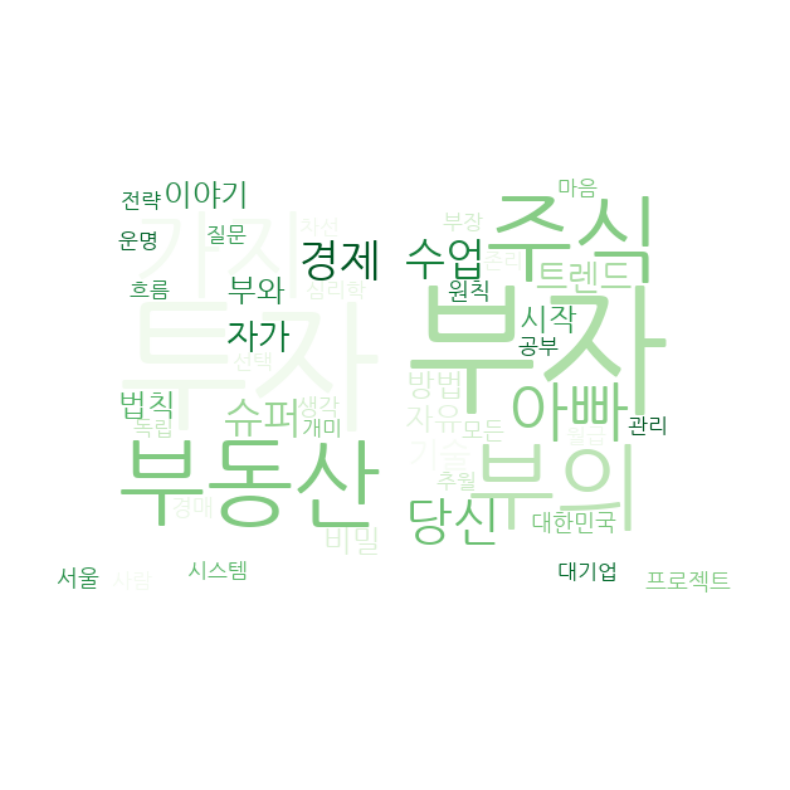

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

data = {
    '투자': 19, '부자': 17, '부동산': 16, '부의': 13, '가지': 12, '주식': 8, '아빠': 7,
    '당신': 7, '경제': 7, '수업': 7, '슈퍼': 5, '트렌드': 5, '기술': 5, '자가': 4,
    '이야기': 4, '방법': 4, '자유': 4, '비밀': 4, '부와': 4, '시작': 4, '법칙': 4,
    '대한민국': 4, '경매': 4, '프로젝트': 4, '생각': 4, '원칙': 4, '모든': 3, '서울': 3,
    '대기업': 3, '부장': 3, '추월': 3, '차선': 3, '심리학': 3, '시스템': 3, '운명': 3,
    '전략': 3, '공부': 3, '월급': 3, '마음': 3, '사람': 3, '흐름': 3, '질문': 3, '존리': 3, '독립': 3, '관리': 3, '선택': 3, '개미': 3}

# 데이터를 공백으로 구분하여 텍스트로 변환
text = ' '.join([word for word, freq in data.items()])

im = Image.open('/content/drive/MyDrive/Colab Notebooks/363.jpg') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# WordCloud 객체 생성
wordcloud = WordCloud(
    max_font_size=150,
    max_words=100,
    colormap = 'Greens',
    background_color='white',
    relative_scaling=1,
    width=1000,
    height=800,
    font_path=FONT_PATH,
    mask=mask_arr,
    prefer_horizontal=True
).generate(text)

# 워드클라우드 이미지 표시
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##연도별 워드클라우드

In [43]:
# ISBN부가기호열에 결측치가 있는 행을 삭제
y2018.dropna(subset=['ISBN부가기호'], inplace=True)
y2019.dropna(subset=['ISBN부가기호'], inplace=True)
y2020.dropna(subset=['ISBN부가기호'], inplace=True)
y2021.dropna(subset=['ISBN부가기호'], inplace=True)
y2022.dropna(subset=['ISBN부가기호'], inplace=True)
y2023.dropna(subset=['ISBN부가기호'], inplace=True)

# 'ISBN부가기호' 열을 정수형으로 변환
y2018['ISBN부가기호'] = y2018['ISBN부가기호'].astype(int)
y2019['ISBN부가기호'] = y2019['ISBN부가기호'].astype(int)
y2020['ISBN부가기호'] = y2020['ISBN부가기호'].astype(int)
y2021['ISBN부가기호'] = y2021['ISBN부가기호'].astype(int)
y2022['ISBN부가기호'] = y2022['ISBN부가기호'].astype(int)
y2023['ISBN부가기호'] = y2023['ISBN부가기호'].astype(int)

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['ISBN부가기호'].astype(str).str[1] != '7']
y2019 = y2019[y2019['ISBN부가기호'].astype(str).str[1] != '7']
y2020 = y2020[y2020['ISBN부가기호'].astype(str).str[1] != '7']
y2021 = y2021[y2021['ISBN부가기호'].astype(str).str[1] != '7']
y2022 = y2022[y2022['ISBN부가기호'].astype(str).str[1] != '7']
y2023 = y2023[y2023['ISBN부가기호'].astype(str).str[1] != '7']

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['ISBN부가기호'].astype(str).str[0] != '7']
y2019 = y2019[y2019['ISBN부가기호'].astype(str).str[0] != '7']
y2020 = y2020[y2020['ISBN부가기호'].astype(str).str[0] != '7']
y2021 = y2021[y2021['ISBN부가기호'].astype(str).str[0] != '7']
y2022 = y2022[y2022['ISBN부가기호'].astype(str).str[0] != '7']
y2023 = y2023[y2023['ISBN부가기호'].astype(str).str[0] != '7']

# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2019['부가기호추출'] = y2019['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2020['부가기호추출'] = y2020['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2021['부가기호추출'] = y2021['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2022['부가기호추출'] = y2022['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2023['부가기호추출'] = y2023['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['부가기호추출'].astype(str).str[0] != '8']
y2019 = y2019[y2019['부가기호추출'].astype(str).str[0] != '8']
y2020 = y2020[y2020['부가기호추출'].astype(str).str[0] != '8']
y2021 = y2021[y2021['부가기호추출'].astype(str).str[0] != '8']
y2022 = y2022[y2022['부가기호추출'].astype(str).str[0] != '8']
y2023 = y2023[y2023['부가기호추출'].astype(str).str[0] != '8']

<ipython-input-43-e2e1486ca39d>:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-43-e2e1486ca39d>:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2019['부가기호추출'] = y2019['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-43-e2e1486ca39d>:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2020['부가기호추출'] = y2020['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipy

In [44]:
!!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype

In [45]:
from konlpy.tag import Okt
from collections import Counter

# 형태소 분석기 초기화
okt = Okt()

# 제목에서 가장 많이 쓰인 단어 추출
titles = y2022['서명']
word_counts = Counter()

for title in titles:
    words = okt.nouns(title)  # 제목에서 명사 추출
    words = [word for word in words if len(word) > 1]  # 길이가 1인 단어 제외
    word_counts.update(words)

# 불필요한 단어 제거
unwanted_words = ['병맛','장편소설', '소설집', '소설','남매','카카오','프렌즈','설민석','오은영']
for word in unwanted_words:
    if word in word_counts:
        del word_counts[word]

In [46]:
print()

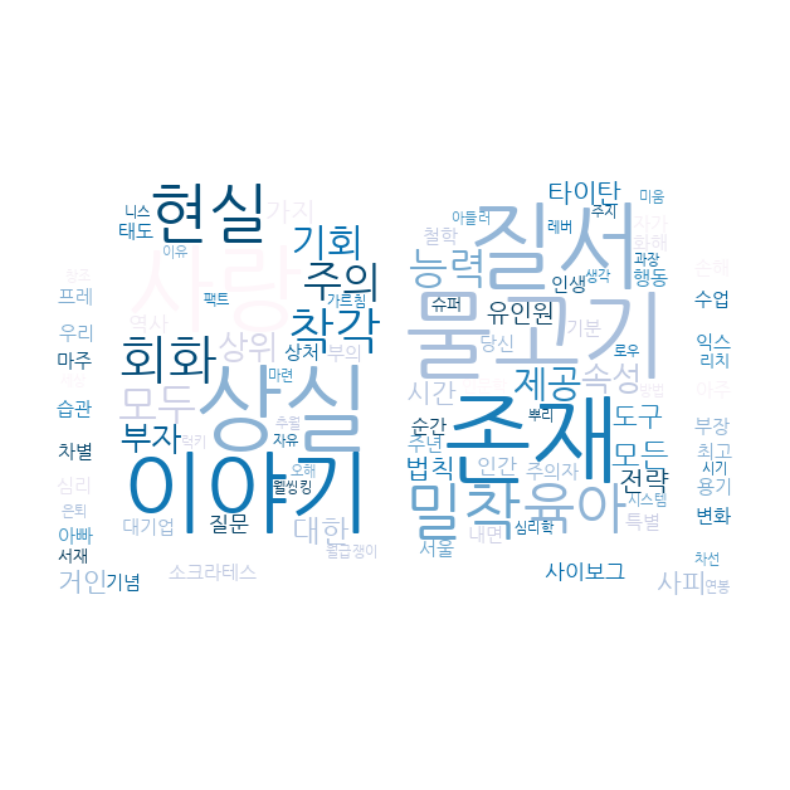

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 데이터를 공백으로 구분하여 텍스트로 변환
text = ' '.join([word for word, freq in word_counts.items()])

im = Image.open('/content/drive/MyDrive/Colab Notebooks/363.jpg') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# WordCloud 객체 생성
wordcloud = WordCloud(
    max_font_size=150,
    max_words=100,
    colormap = 'PuBu',
    background_color='white',
    relative_scaling=1,
    width=1000,
    height=800,
    font_path=FONT_PATH,
    mask=mask_arr,
    prefer_horizontal=True
).generate(text)

# 워드클라우드 이미지 표시
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 주식키워드분석

In [48]:
y2018 = pd.read_csv('/content/drive/MyDrive/library/경영경제/인기대출도서_2018.csv',encoding="cp949",delimiter=',',header=12)
y2019 = pd.read_csv('/content/drive/MyDrive/library/경영경제/인기대출도서_2019.csv',encoding="cp949",delimiter=',',header=12)
y2020 = pd.read_csv('/content/drive/MyDrive/library/경영경제/인기대출도서_2020.csv',encoding="cp949",delimiter=',',header=12)
y2021 = pd.read_csv('/content/drive/MyDrive/library/경영경제/인기대출도서_2021.csv',encoding="cp949",delimiter=',',header=12)
y2022 = pd.read_csv('/content/drive/MyDrive/library/경영경제/인기대출도서_2022.csv',encoding="cp949",delimiter=',',header=12)
y2023 = pd.read_csv('/content/drive/MyDrive/library/경영경제/인기대출도서_2023.csv',encoding="cp949",delimiter=',',header=12)


# ISBN부가기호열에 결측치가 있는 행을 삭제
y2018.dropna(subset=['ISBN부가기호'], inplace=True)
y2019.dropna(subset=['ISBN부가기호'], inplace=True)
y2020.dropna(subset=['ISBN부가기호'], inplace=True)
y2021.dropna(subset=['ISBN부가기호'], inplace=True)
y2022.dropna(subset=['ISBN부가기호'], inplace=True)
y2023.dropna(subset=['ISBN부가기호'], inplace=True)

# 'ISBN부가기호' 열을 정수형으로 변환
y2018['ISBN부가기호'] = y2018['ISBN부가기호'].astype(int)
y2019['ISBN부가기호'] = y2019['ISBN부가기호'].astype(int)
y2020['ISBN부가기호'] = y2020['ISBN부가기호'].astype(int)
y2021['ISBN부가기호'] = y2021['ISBN부가기호'].astype(int)
y2022['ISBN부가기호'] = y2022['ISBN부가기호'].astype(int)
y2023['ISBN부가기호'] = y2023['ISBN부가기호'].astype(int)

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['ISBN부가기호'].astype(str).str[1] != '7']
y2019 = y2019[y2019['ISBN부가기호'].astype(str).str[1] != '7']
y2020 = y2020[y2020['ISBN부가기호'].astype(str).str[1] != '7']
y2021 = y2021[y2021['ISBN부가기호'].astype(str).str[1] != '7']
y2022 = y2022[y2022['ISBN부가기호'].astype(str).str[1] != '7']
y2023 = y2023[y2023['ISBN부가기호'].astype(str).str[1] != '7']

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['ISBN부가기호'].astype(str).str[0] != '7']
y2019 = y2019[y2019['ISBN부가기호'].astype(str).str[0] != '7']
y2020 = y2020[y2020['ISBN부가기호'].astype(str).str[0] != '7']
y2021 = y2021[y2021['ISBN부가기호'].astype(str).str[0] != '7']
y2022 = y2022[y2022['ISBN부가기호'].astype(str).str[0] != '7']
y2023 = y2023[y2023['ISBN부가기호'].astype(str).str[0] != '7']

# ISBN부가기호열에서 오른쪽에서 두 번째와 세 번째 숫자를 십의 자리 숫자로 추출하여 새로운 열 추가
y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2019['부가기호추출'] = y2019['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2020['부가기호추출'] = y2020['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2021['부가기호추출'] = y2021['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2022['부가기호추출'] = y2022['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
y2023['부가기호추출'] = y2023['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)

# 만화카테고리의 책 삭제
y2018 = y2018[y2018['부가기호추출'].astype(str).str[0] != '8']
y2019 = y2019[y2019['부가기호추출'].astype(str).str[0] != '8']
y2020 = y2020[y2020['부가기호추출'].astype(str).str[0] != '8']
y2021 = y2021[y2021['부가기호추출'].astype(str).str[0] != '8']
y2022 = y2022[y2022['부가기호추출'].astype(str).str[0] != '8']
y2023 = y2023[y2023['부가기호추출'].astype(str).str[0] != '8']

<ipython-input-48-f7701cd47273>:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2018['부가기호추출'] = y2018['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-48-f7701cd47273>:43: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2019['부가기호추출'] = y2019['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipython-input-48-f7701cd47273>:44: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y2020['부가기호추출'] = y2020['ISBN부가기호'].astype(str).str[-3:-1].str.replace('.', '').astype(int)
<ipy

In [49]:
print(y2018)

      순위                                         서명  \
0      1            그릿 :IQ, 재능, 환경을 뛰어넘는 열정적 끈기의 힘    
1      2                            호모 데우스 :미래의 역사    
2      3                우리에겐 언어가 필요하다 :입이 트이는 페미니즘    
3      4  나쁜 페미니스트 :불편하고 두려워서 페미니스트라고 말하지 못하는 당신에게    
4      5        도시는 무엇으로 사는가 :도시를 보는 열다섯 가지 인문적 시선    
..   ...                                        ...   
995  986           진화된 마케팅 그로스 해킹 :프로세스와 실행 전략 바이블    
996  986                인테리어 재테크 :보기 좋은 집이 돈을 벌어준다    
997  986               대한민국 페미니스트의 고백 - 1997 - 2017   
998  999                               경청:마음을 얻는 지혜   
999  999                             사회복지사의 희망 이야기    

                                         저자     출판사  출판년도   권           ISBN  \
0                       앤절라 더크워스 지음 ;김미정 옮김  비즈니스북스  2016 NaN  9791186805398   
1                     지은이: 유발 하라리 ;옮긴이: 김명주     김영사  2017 NaN  9788934977841   
2                                    이민경 지음     봄알람  2016 NaN  9791195857906   
3                  

In [50]:
# 키워드 리스트
keywords = ['주식', '투자', '코인', '화폐', '재테크', '메타']

# 각 키워드별 대출 건수 합 계산
keyword_loan_counts = {}

for keyword in keywords:
    filtered_df = y2018[y2018['서명'].str.contains(keyword)]
    total_loan_count = filtered_df['대출건수'].str.replace(',', '').astype(int).sum()
    keyword_loan_counts[keyword] = total_loan_count

# 결과 출력
for keyword, loan_count in keyword_loan_counts.items():
    print(f"'{keyword}'와 관련된 책의 총 대출 건수: {loan_count}")



'주식'와 관련된 책의 총 대출 건수: 24794
'투자'와 관련된 책의 총 대출 건수: 68377
'코인'와 관련된 책의 총 대출 건수: 2122
'화폐'와 관련된 책의 총 대출 건수: 2435
'재테크'와 관련된 책의 총 대출 건수: 26171
'메타'와 관련된 책의 총 대출 건수: 0


In [51]:
loan_counts = {
    '주식': 24794,
    '투자': 68377,
    '코인': 2122,
    '화폐': 2435,
    '재테크': 26171,
    '메타': 0
}
total_loans = sum(loan_counts.values())
print("총 대출 건수:", total_loans)

총 대출 건수: 123899


In [52]:
# 키워드 리스트
keywords = ['주식', '투자', '코인', '화폐', '재테크', '메타']

# 각 키워드별 대출 건수 합 계산
keyword_loan_counts = {}

for keyword in keywords:
    filtered_df = y2019[y2019['서명'].str.contains(keyword)]
    total_loan_count = filtered_df['대출건수'].str.replace(',', '').astype(int).sum()
    keyword_loan_counts[keyword] = total_loan_count

# 결과 출력
for keyword, loan_count in keyword_loan_counts.items():
    print(f"'{keyword}'와 관련된 책의 총 대출 건수: {loan_count}")

'주식'와 관련된 책의 총 대출 건수: 24013
'투자'와 관련된 책의 총 대출 건수: 64622
'코인'와 관련된 책의 총 대출 건수: 0
'화폐'와 관련된 책의 총 대출 건수: 826
'재테크'와 관련된 책의 총 대출 건수: 22721
'메타'와 관련된 책의 총 대출 건수: 0


In [53]:
loan_counts = {
    '주식': 24013,
    '투자': 64622,
    '코인': 0,
    '화폐': 826,
    '재테크': 22721,
    '메타': 0
}

total_loans = sum(loan_counts.values())
print("총 대출 건수:", total_loans)

총 대출 건수: 112182


In [54]:
# 키워드 리스트
keywords = ['주식', '투자', '코인', '화폐', '재테크', '메타']

# 각 키워드별 대출 건수 합 계산
keyword_loan_counts = {}

for keyword in keywords:
    filtered_df = y2020[y2020['서명'].str.contains(keyword)]
    total_loan_count = filtered_df['대출건수'].str.replace(',', '').astype(int).sum()
    keyword_loan_counts[keyword] = total_loan_count

# 결과 출력
for keyword, loan_count in keyword_loan_counts.items():
    print(f"'{keyword}'와 관련된 책의 총 대출 건수: {loan_count}")

'주식'와 관련된 책의 총 대출 건수: 33283
'투자'와 관련된 책의 총 대출 건수: 59327
'코인'와 관련된 책의 총 대출 건수: 157
'화폐'와 관련된 책의 총 대출 건수: 261
'재테크'와 관련된 책의 총 대출 건수: 11392
'메타'와 관련된 책의 총 대출 건수: 0


In [55]:
loan_counts = {
    '주식': 33283,
    '투자': 59327,
    '코인': 157,
    '화폐': 261,
    '재테크': 11392,
    '메타': 0
}

total_loans = sum(loan_counts.values())
print("총 대출 건수:", total_loans)

총 대출 건수: 104420


In [56]:
# 키워드 리스트
keywords = ['주식', '투자', '코인', '화폐', '재테크', '메타']

# 각 키워드별 대출 건수 합 계산
keyword_loan_counts = {}

for keyword in keywords:
    filtered_df = y2021[y2021['서명'].str.contains(keyword)]
    total_loan_count = filtered_df['대출건수'].str.replace(',', '').astype(int).sum()
    keyword_loan_counts[keyword] = total_loan_count

# 결과 출력
for keyword, loan_count in keyword_loan_counts.items():
    print(f"'{keyword}'와 관련된 책의 총 대출 건수: {loan_count}")

'주식'와 관련된 책의 총 대출 건수: 67871
'투자'와 관련된 책의 총 대출 건수: 105285
'코인'와 관련된 책의 총 대출 건수: 1916
'화폐'와 관련된 책의 총 대출 건수: 2583
'재테크'와 관련된 책의 총 대출 건수: 13825
'메타'와 관련된 책의 총 대출 건수: 3820


In [57]:
loan_counts = {
    '주식': 67871,
    '투자': 105285,
    '코인': 1916,
    '화폐': 2583,
    '재테크': 13825,
    '메타': 3820
}

total_loans = sum(loan_counts.values())
print("총 대출 건수:", total_loans)

총 대출 건수: 195300


In [58]:
# 키워드 리스트
keywords = ['주식', '투자', '코인', '화폐', '재테크', '메타']

# 각 키워드별 대출 건수 합 계산
keyword_loan_counts = {}

for keyword in keywords:
    filtered_df = y2022[y2022['서명'].str.contains(keyword)]
    total_loan_count = filtered_df['대출건수'].str.replace(',', '').astype(int).sum()
    keyword_loan_counts[keyword] = total_loan_count

# 결과 출력
for keyword, loan_count in keyword_loan_counts.items():
    print(f"'{keyword}'와 관련된 책의 총 대출 건수: {loan_count}")

'주식'와 관련된 책의 총 대출 건수: 40320
'투자'와 관련된 책의 총 대출 건수: 88358
'코인'와 관련된 책의 총 대출 건수: 1671
'화폐'와 관련된 책의 총 대출 건수: 1487
'재테크'와 관련된 책의 총 대출 건수: 11675
'메타'와 관련된 책의 총 대출 건수: 9246


In [59]:
loan_counts = {
    '주식': 40320,
    '투자': 88358,
    '코인': 1671,
    '화폐': 1487,
    '재테크': 11675,
    '메타': 9246
}

total_loans = sum(loan_counts.values())
print("총 대출 건수:", total_loans)

총 대출 건수: 152757


In [60]:
# 키워드 리스트
keywords = ['주식', '투자', '코인', '화폐', '재테크', '메타']

# 각 키워드별 대출 건수 합 계산
keyword_loan_counts = {}

for keyword in keywords:
    filtered_df = y2023[y2023['서명'].str.contains(keyword)]
    total_loan_count = filtered_df['대출건수'].str.replace(',', '').astype(int).sum()
    keyword_loan_counts[keyword] = total_loan_count

# 결과 출력
for keyword, loan_count in keyword_loan_counts.items():
    print(f"'{keyword}'와 관련된 책의 총 대출 건수: {loan_count}")

'주식'와 관련된 책의 총 대출 건수: 13072
'투자'와 관련된 책의 총 대출 건수: 33042
'코인'와 관련된 책의 총 대출 건수: 0
'화폐'와 관련된 책의 총 대출 건수: 304
'재테크'와 관련된 책의 총 대출 건수: 5313
'메타'와 관련된 책의 총 대출 건수: 957


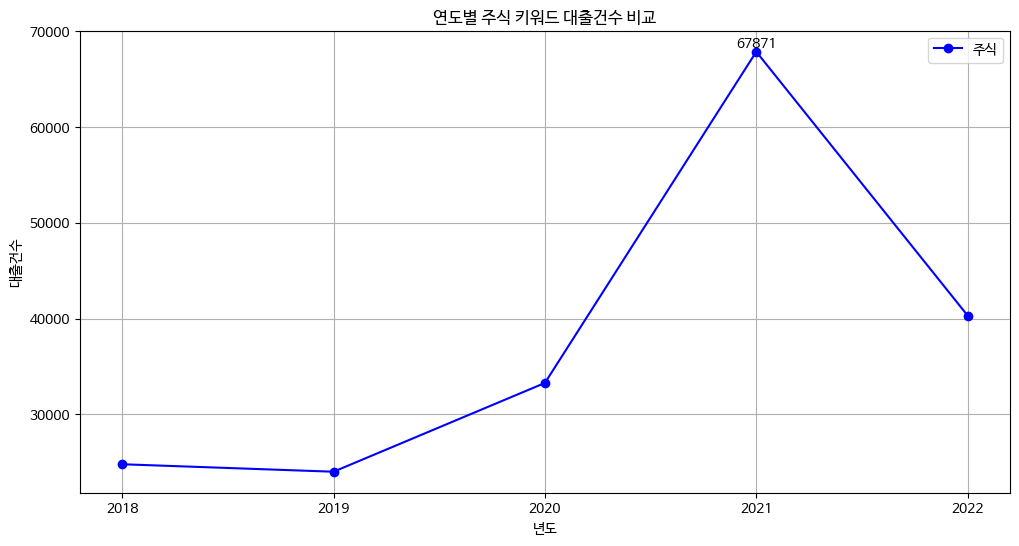

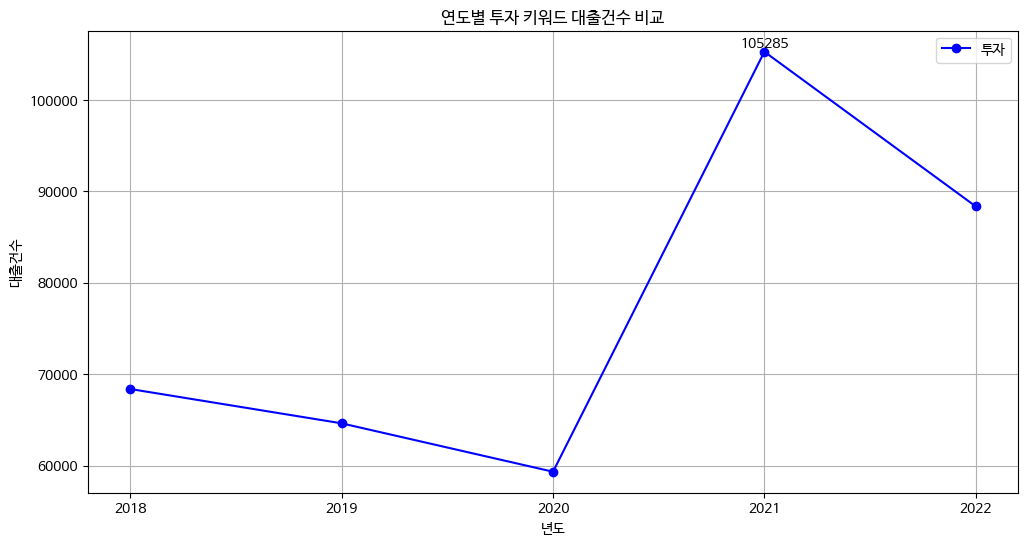

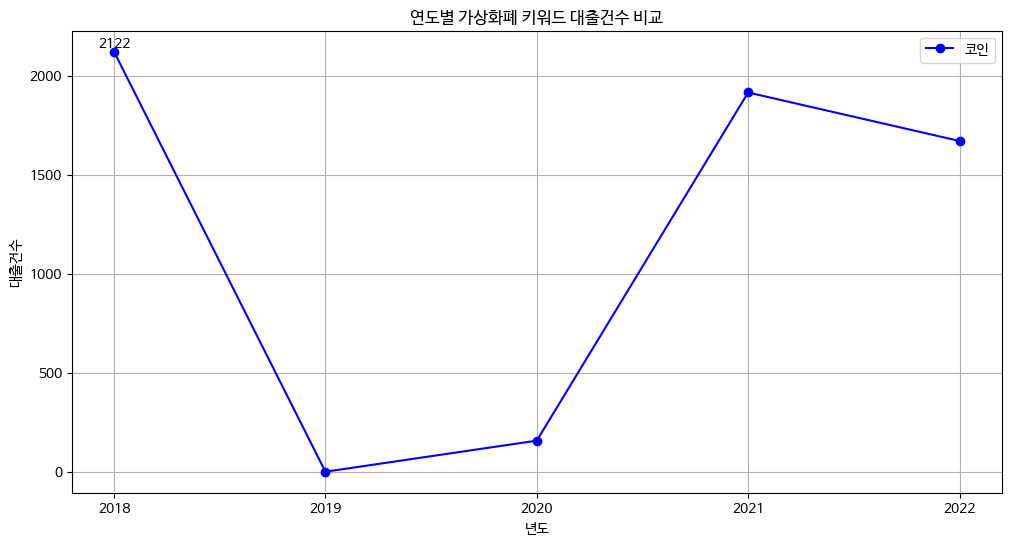

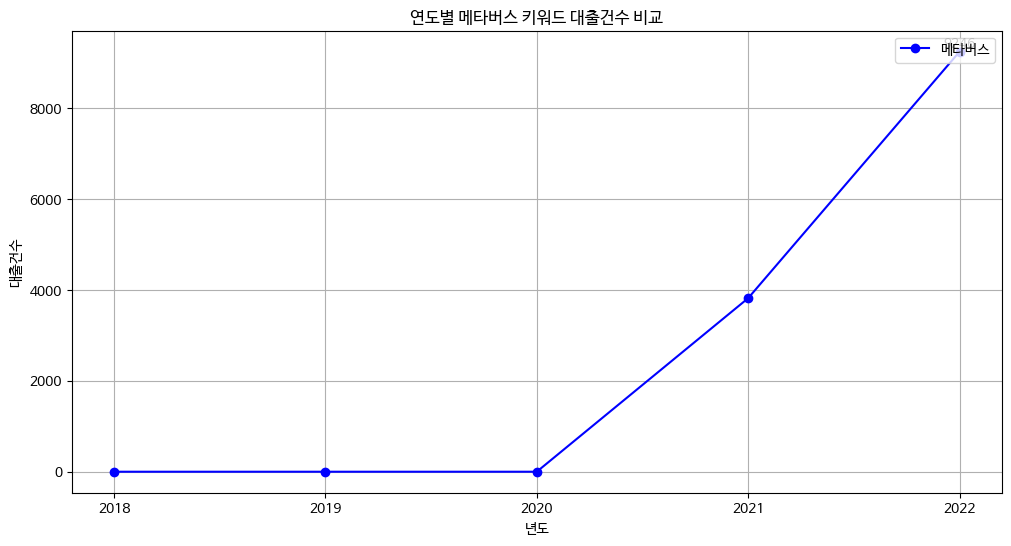

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    '주식': [24794, 24013,33283,67871,40320]
}

years = ['2018', '2019', '2020', '2021', '2022']

df = pd.DataFrame(data, index=years)

plt.figure(figsize=(12, 6))

for category in df.columns:
    plt.plot(df.index, df[category], marker='o', label=category, color='b')

    # 가장 큰 값의 위치와 값 표시
    max_index = df[category].idxmax()
    max_value = df.at[max_index, category]
    plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')

plt.title('연도별 주식 키워드 대출건수 비교')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.legend(loc='upper right')  # 범례 위치 지정
plt.grid(True)
plt.show()


data = {
    '투자': [68377,64622,59327,105285,88358]
}

years = ['2018', '2019', '2020', '2021', '2022']

df = pd.DataFrame(data, index=years)

plt.figure(figsize=(12, 6))

for category in df.columns:
    plt.plot(df.index, df[category], marker='o', label=category, color='b')

    # 가장 큰 값의 위치와 값 표시
    max_index = df[category].idxmax()
    max_value = df.at[max_index, category]
    plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')

plt.title('연도별 투자 키워드 대출건수 비교')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.legend(loc='upper right')  # 범례 위치 지정
plt.grid(True)
plt.show()

data = {
    '코인': [2122,0,157,1916,1671]
}

years = ['2018', '2019', '2020', '2021', '2022']

df = pd.DataFrame(data, index=years)

plt.figure(figsize=(12, 6))

for category in df.columns:
    plt.plot(df.index, df[category], marker='o', label=category, color='b')

    # 가장 큰 값의 위치와 값 표시
    max_index = df[category].idxmax()
    max_value = df.at[max_index, category]
    plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')

plt.title('연도별 가상화폐 키워드 대출건수 비교')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.legend(loc='upper right')  # 범례 위치 지정
plt.grid(True)
plt.show()


data = {
    '메타버스': [0, 0, 0, 3820,9246]
}

years = ['2018', '2019', '2020', '2021', '2022']

df = pd.DataFrame(data, index=years)

plt.figure(figsize=(12, 6))

for category in df.columns:
    plt.plot(df.index, df[category], marker='o', label=category, color='b')

    # 가장 큰 값의 위치와 값 표시
    max_index = df[category].idxmax()
    max_value = df.at[max_index, category]
    plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')

plt.title('연도별 메타버스 키워드 대출건수 비교')
plt.xlabel('년도')
plt.ylabel('대출건수')
plt.legend(loc='upper right')  # 범례 위치 지정
plt.grid(True)
plt.show()

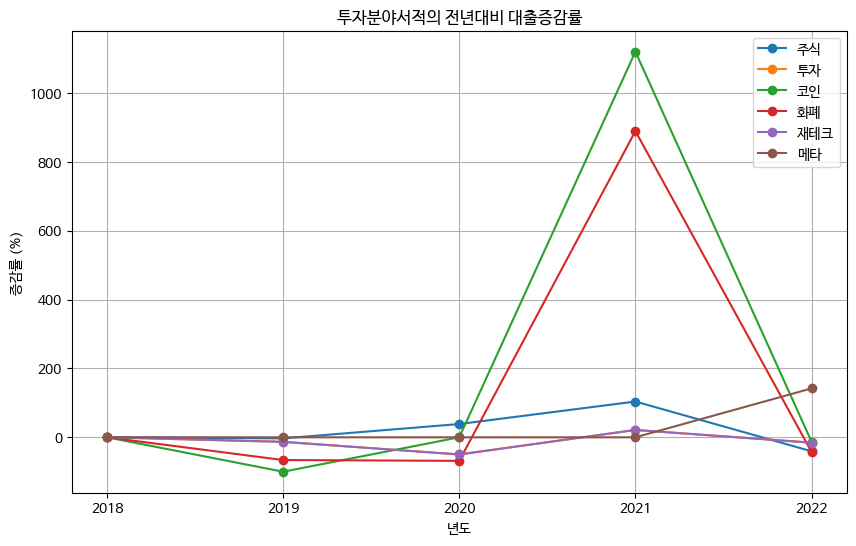

In [62]:
import matplotlib.pyplot as plt

# 데이터 정의
years = ['2018', '2019', '2020', '2021', '2022']
stock_values = [24794, 24013,33283,67871,40320]
investment_values = [68377,64622,59327,105285,88358]
coin_values = [2122,0,157,1916,1671]
hwapae_values = [2435,826,261,2583,1487]
investment_growth = [26171,22721,11392,13825,11675]
metabus_growth = [0, 0, 0, 3820,9246]


# 증감률 계산 함수
def calculate_growth_rate(initial, final):
    return ((final - initial) / initial) * 100 if initial != 0 else 0

# 증감률 계산
stock_growth_rates = [calculate_growth_rate(stock_values[i-1], stock_values[i]) if i > 0 else 0 for i in range(len(years))]
investment_growth_rates = [calculate_growth_rate(investment_values[i-1], investment_values[i]) if i > 0 else 0 for i in range(len(years))]
coin_growth_rates = [calculate_growth_rate(coin_values[i-1], coin_values[i]) if i > 0 else 0 for i in range(len(years))]
hwapae_growth_rates = [calculate_growth_rate(hwapae_values[i-1], hwapae_values[i]) if i > 0 else 0 for i in range(len(years))]
investment_growth_rates = [calculate_growth_rate(investment_growth[i-1], investment_growth[i]) if i > 0 else 0 for i in range(len(years))]
metabus_growth_rates = [calculate_growth_rate(metabus_growth[i-1], metabus_growth[i]) if i > 0 else 0 for i in range(len(years))]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, stock_growth_rates, marker='o', label='주식')
plt.plot(years, investment_growth_rates, marker='o', label='투자')
plt.plot(years, coin_growth_rates, marker='o', label='코인')
plt.plot(years, hwapae_growth_rates, marker='o', label='화폐')
plt.plot(years, investment_growth_rates, marker='o', label='재테크')
plt.plot(years, metabus_growth_rates, marker='o', label='메타')
plt.xlabel('년도')
plt.ylabel('증감률 (%)')
plt.title('투자분야서적의 전년대비 대출증감률')
plt.legend()
plt.grid(True)
# y축 범위 설정
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


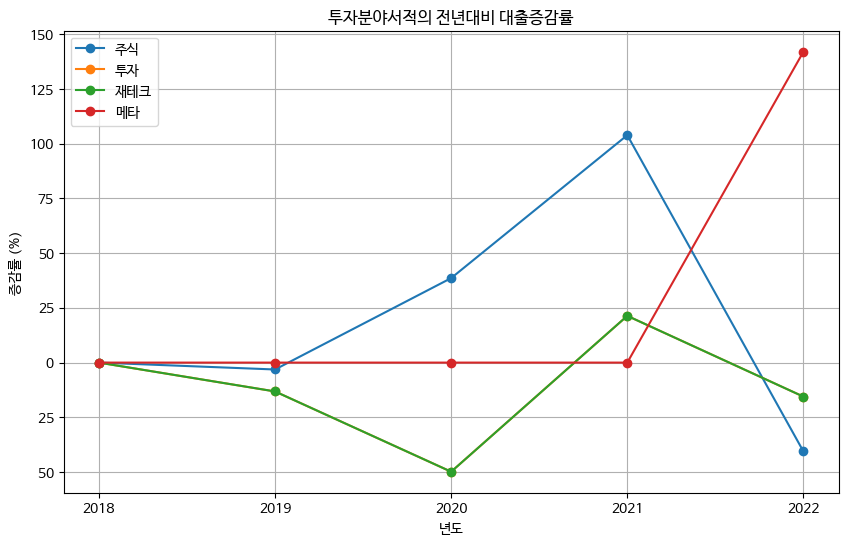

In [63]:
import matplotlib.pyplot as plt

# 데이터 정의
stock_values = [24794, 24013,33283,67871,40320]
investment_values = [68377,64622,59327,105285,88358]
coin_values = [2122,0,157,1916,1671]
investment_growth = [26171,22721,11392,13825,11675]
metabus_growth = [0, 0, 0, 3820,9246]

# 증감률 계산 함수
def calculate_growth_rate(initial, final):
    return ((final - initial) / initial) * 100 if initial != 0 else 0

# 증감률 계산
stock_growth_rates = [calculate_growth_rate(stock_values[i-1], stock_values[i]) if i > 0 else 0 for i in range(len(years))]
investment_growth_rates = [calculate_growth_rate(investment_values[i-1], investment_values[i]) if i > 0 else 0 for i in range(len(years))]
investment_growth_rates = [calculate_growth_rate(investment_growth[i-1], investment_growth[i]) if i > 0 else 0 for i in range(len(years))]
metabus_growth_rates = [calculate_growth_rate(metabus_growth[i-1], metabus_growth[i]) if i > 0 else 0 for i in range(len(years))]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, stock_growth_rates, marker='o', label='주식')
plt.plot(years, investment_growth_rates, marker='o', label='투자')
plt.plot(years, investment_growth_rates, marker='o', label='재테크')
plt.plot(years, metabus_growth_rates, marker='o', label='메타')
plt.xlabel('년도')
plt.ylabel('증감률 (%)')
plt.title('투자분야서적의 전년대비 대출증감률')
plt.legend()
plt.grid(True)
# y축 범위 설정
plt.show()